In [3]:
import matplotlib.pyplot as plt
from mcam import MCAM

In [4]:
# Folder where the experiment folders are located
data_folder = r'F:\20230705_NaumannLab_DOI_Experiments'

## Process or load the individual datasets

In [5]:
mcam = MCAM(data_folder, prefix='EK', concentrations=[0, 0.05, 0.5, 2.5, 5, 50])

found F:\20230705_NaumannLab_DOI_Experiments\csv_files\24hour_recovery_distance_0.05.csv
found F:\20230705_NaumannLab_DOI_Experiments\csv_files\24hour_recovery_distance_0.5.csv
found F:\20230705_NaumannLab_DOI_Experiments\csv_files\24hour_recovery_distance_0.csv
found F:\20230705_NaumannLab_DOI_Experiments\csv_files\24hour_recovery_distance_2.5.csv
found F:\20230705_NaumannLab_DOI_Experiments\csv_files\24hour_recovery_distance_5.csv
found F:\20230705_NaumannLab_DOI_Experiments\csv_files\24hour_recovery_distance_50.csv
found F:\20230705_NaumannLab_DOI_Experiments\csv_files\24hour_recovery_tracking_0.05.csv
found F:\20230705_NaumannLab_DOI_Experiments\csv_files\24hour_recovery_tracking_0.5.csv
found F:\20230705_NaumannLab_DOI_Experiments\csv_files\24hour_recovery_tracking_0.csv
found F:\20230705_NaumannLab_DOI_Experiments\csv_files\24hour_recovery_tracking_2.5.csv
found F:\20230705_NaumannLab_DOI_Experiments\csv_files\24hour_recovery_tracking_5.csv
found F:\20230705_NaumannLab_DOI_Experi

In [176]:
# Adds a binned_time column which is the time that each row belongs to

time_bin = 1.0 # in seconds

for condition in dfs.values():
    for df in condition.values():
        df['binned_time'] = 0

        for i, row in df.iterrows():
            if df.loc[i, 'time'] < time_bin:
                df.loc[i, 'binned_time'] = time_bin
            else:
                time_bin += 1
                df.loc[i, 'binned_time'] = time_bin

        time_bin = 1.0

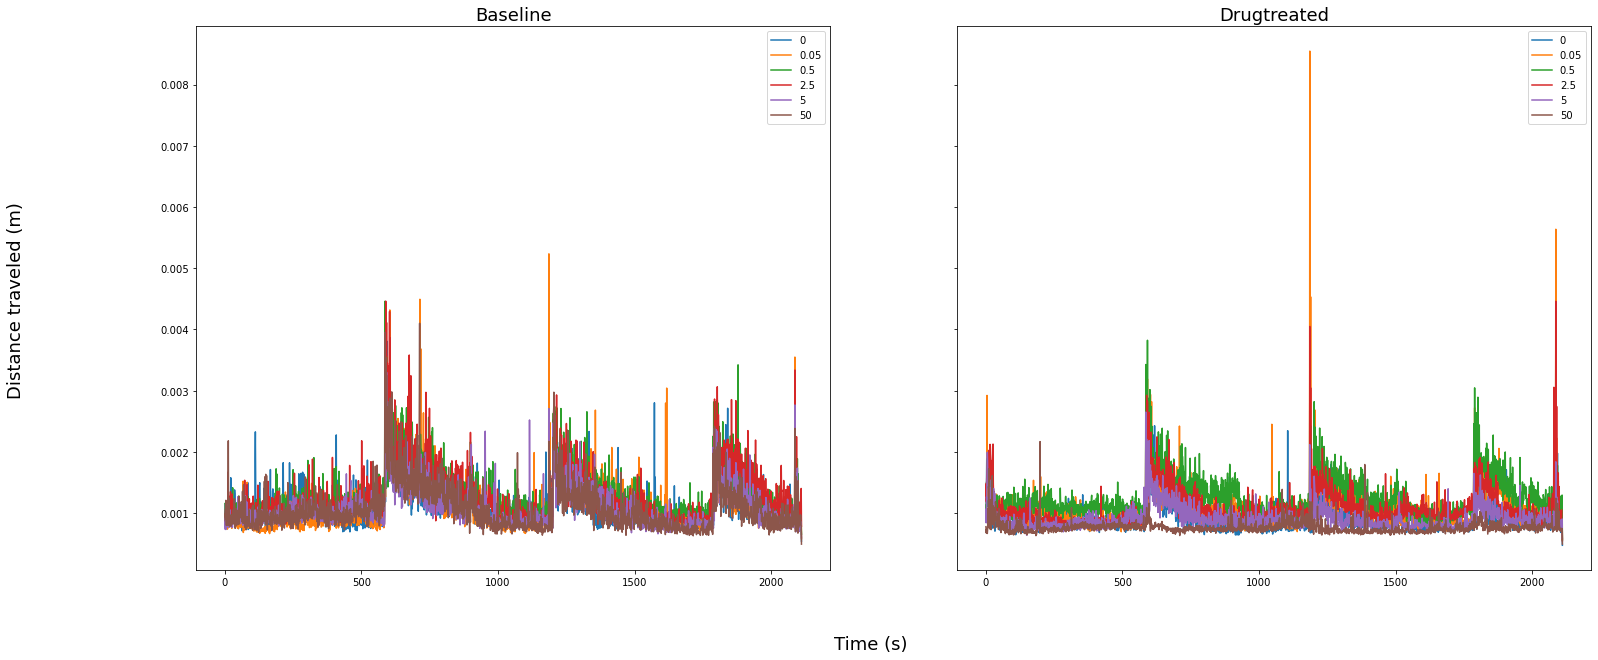

In [93]:
fig, axs = plt.subplots(1, 2, figsize=(25, 10), sharey=True, sharex=True)

for conc, df in dfs['baseline_dfs'].items():
    axs[0].plot(df.groupby(['binned_time']).sum()['average_dist'], label=str(conc))

for conc, df in dfs['drugtreated_dfs'].items():
    axs[1].plot(df.groupby(['binned_time']).sum()['average_dist'], label=str(conc))

axs[0].set_title('Baseline', fontsize=18)
axs[1].set_title('Drugtreated', fontsize=18)

axs[0].legend()
axs[1].legend()

fig.supxlabel('Time (s)', fontsize=18)
fig.supylabel('Distance traveled (m)', fontsize=18)

plt.savefig(os.path.join(data_folder, f'distance_traveled_bd_binned{time_bin}s.pdf'))

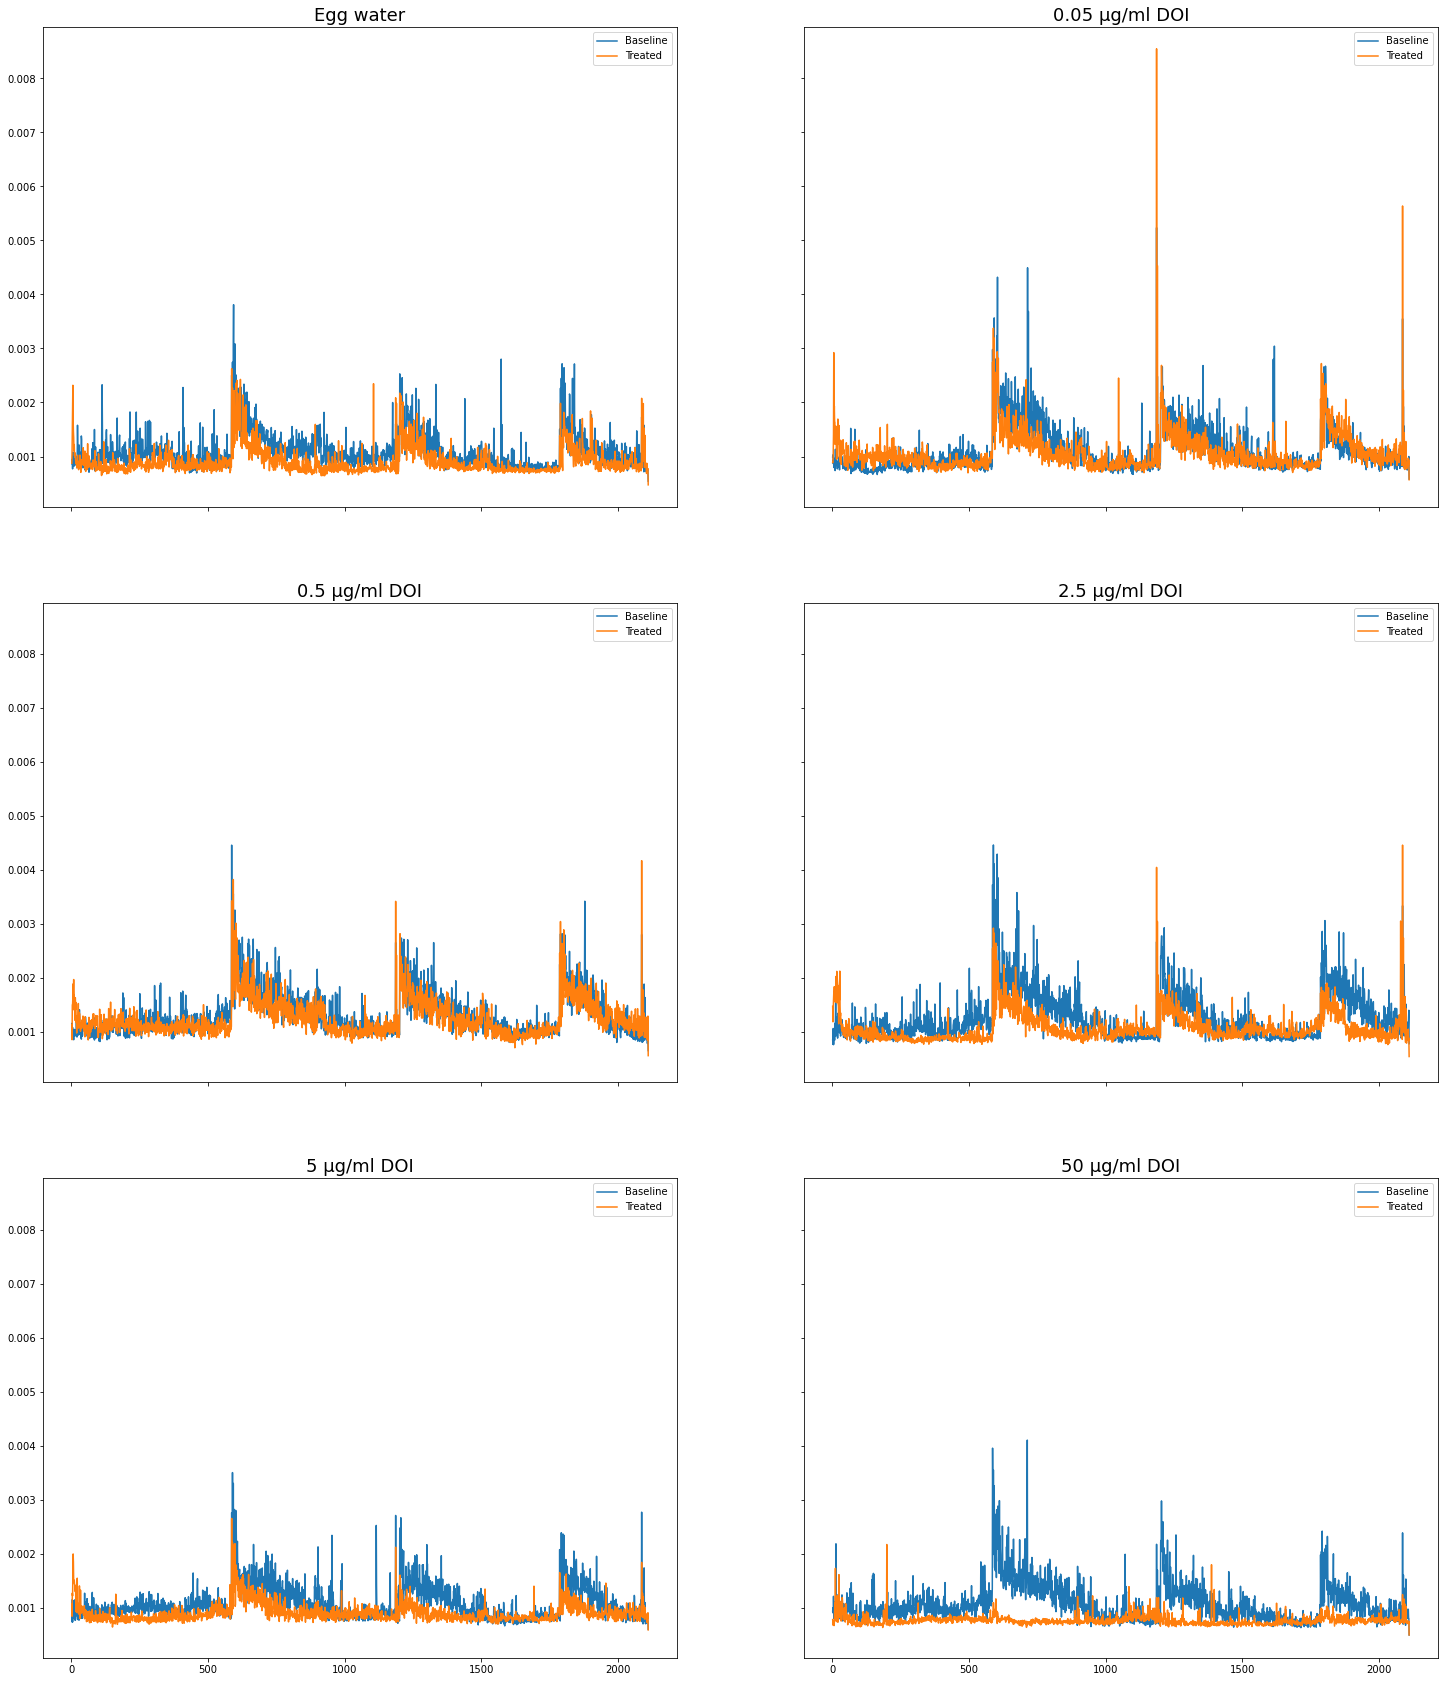

In [96]:
fig, axs = plt.subplots(3, 2, figsize=(25, 30), sharey=True, sharex=True)

axs[0, 0].plot(dfs['baseline_dfs'][0].groupby(['binned_time']).sum()['average_dist'], label='Baseline')
axs[0, 0].plot(dfs['drugtreated_dfs'][0].groupby(['binned_time']).sum()['average_dist'], label='Treated')
axs[0, 0].set_title('Egg water', fontsize=18)
axs[0, 0].legend()

axs[0, 1].plot(dfs['baseline_dfs'][0.05].groupby(['binned_time']).sum()['average_dist'], label='Baseline')
axs[0, 1].plot(dfs['drugtreated_dfs'][0.05].groupby(['binned_time']).sum()['average_dist'], label='Treated')
axs[0, 1].set_title('0.05 µg/ml DOI', fontsize=18)
axs[0, 1].legend()

axs[1, 0].plot(dfs['baseline_dfs'][0.5].groupby(['binned_time']).sum()['average_dist'], label='Baseline')
axs[1, 0].plot(dfs['drugtreated_dfs'][0.5].groupby(['binned_time']).sum()['average_dist'], label='Treated')
axs[1, 0].set_title('0.5 µg/ml DOI', fontsize=18)
axs[1, 0].legend()

axs[1, 1].plot(dfs['baseline_dfs'][2.5].groupby(['binned_time']).sum()['average_dist'], label='Baseline')
axs[1, 1].plot(dfs['drugtreated_dfs'][2.5].groupby(['binned_time']).sum()['average_dist'], label='Treated')
axs[1, 1].set_title('2.5 µg/ml DOI', fontsize=18)
axs[1, 1].legend()

axs[2, 0].plot(dfs['baseline_dfs'][5].groupby(['binned_time']).sum()['average_dist'], label='Baseline')
axs[2, 0].plot(dfs['drugtreated_dfs'][5].groupby(['binned_time']).sum()['average_dist'], label='Treated')
axs[2, 0].set_title('5 µg/ml DOI', fontsize=18)
axs[2, 0].legend()

axs[2, 1].plot(dfs['baseline_dfs'][50].groupby(['binned_time']).sum()['average_dist'], label='Baseline')
axs[2, 1].plot(dfs['drugtreated_dfs'][50].groupby(['binned_time']).sum()['average_dist'], label='Treated')
axs[2, 1].set_title('50 µg/ml DOI', fontsize=18)
axs[2, 1].legend()

plt.savefig(os.path.join(data_folder, f'distance_traveled_ed_binned{time_bin}s.pdf'))

### Dark flash #1

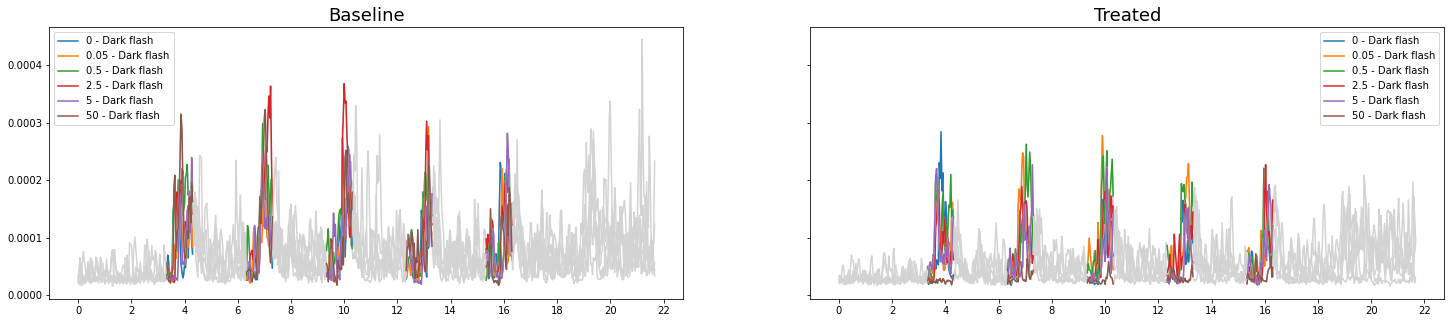

In [97]:
fig, axs = plt.subplots(1, 2, figsize=(25, 5), sharey=True, sharex=True)

gap = 100

for conc, df in dfs['baseline_dfs'].items():
    dflash_start = df[df.stim_name == 'dark_flash'].index.values[0]
    depoch_start = df[df.stim_name == 'dark_epoch'].index.values[0]

    dflash_subdf = df.loc[dflash_start-gap:depoch_start+gap, :]
    x = dflash_subdf.time - dflash_subdf.time.iloc[0]

    y = dflash_subdf.average_dist.copy()
    flash = y.copy()
    flash[dflash_subdf.stim_name != 'dark_flash'] = np.nan

    axs[0].plot(x, y, color='lightgray')
    axs[0].plot(x, flash, label=f'{conc} - Dark flash')
    axs[0].set_xticks(np.arange(min(x), max(x)+1, 2.0))
    axs[0].legend()
    axs[0].set_title('Baseline', fontsize=18)

for conc, df in dfs['drugtreated_dfs'].items():
    dflash_start = df[df.stim_name == 'dark_flash'].index.values[0]
    depoch_start = df[df.stim_name == 'dark_epoch'].index.values[0]

    dflash_subdf = df.loc[dflash_start-gap:depoch_start+gap, :]
    x = dflash_subdf.time - dflash_subdf.time.iloc[0]

    y = dflash_subdf.average_dist.copy()
    flash = y.copy()
    flash[dflash_subdf.stim_name != 'dark_flash'] = np.nan

    axs[1].plot(x, y, color='lightgray')
    axs[1].plot(x, flash, label=f'{conc} - Dark flash')
    axs[1].set_xticks(np.arange(min(x), max(x)+1, 2.0))
    axs[1].legend()
    axs[1].set_title('Treated', fontsize=18)

plt.savefig(os.path.join(data_folder, f'darkflash_bd.pdf'))

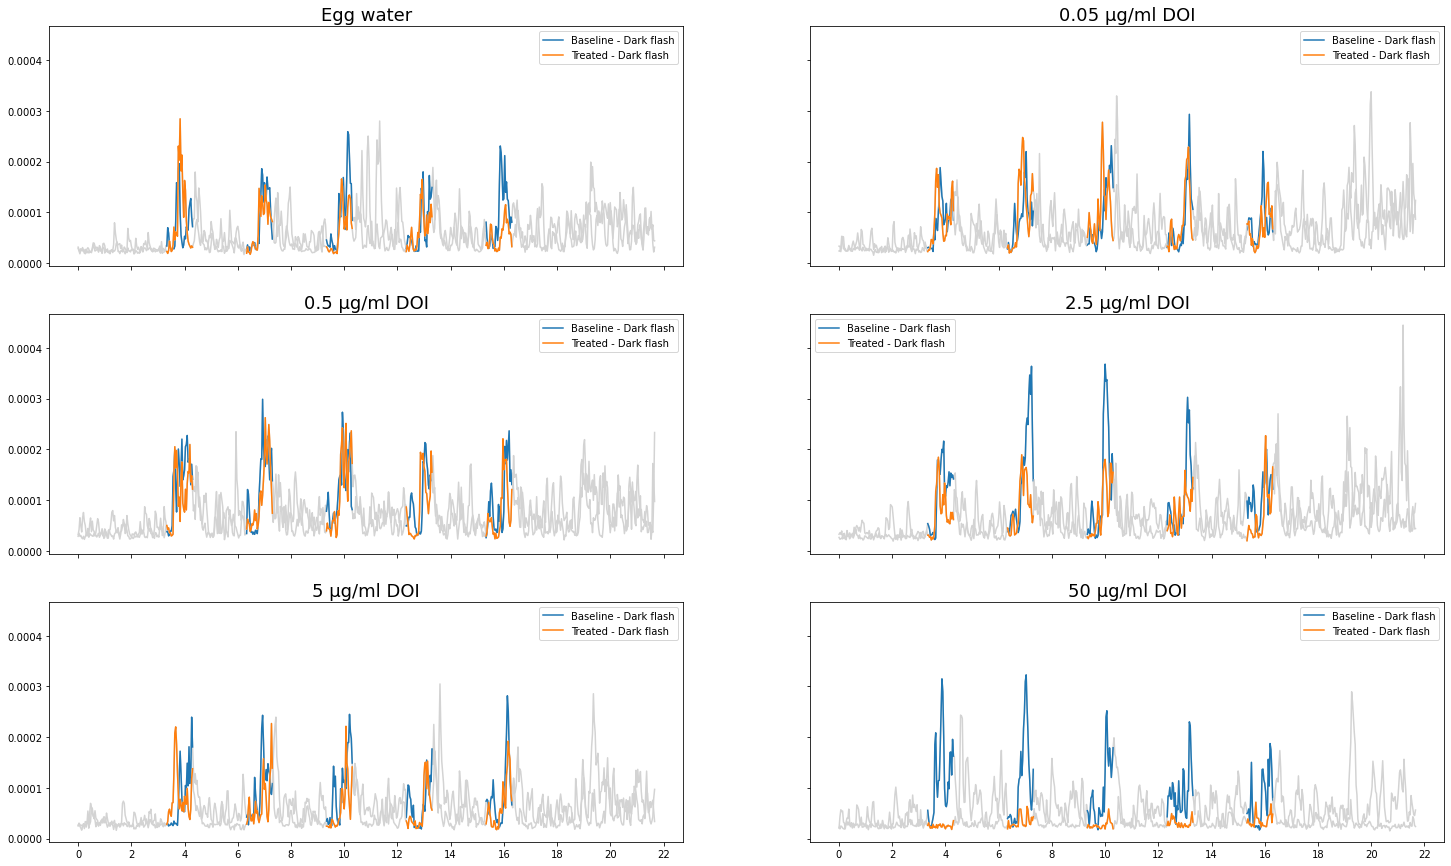

In [98]:
fig, axs = plt.subplots(3, 2, figsize=(25, 15), sharey=True, sharex=True)

gap = 100

for conc, df in dfs['baseline_dfs'].items():
    dflash_start = df[df.stim_name == 'dark_flash'].index.values[0]
    depoch_start = df[df.stim_name == 'dark_epoch'].index.values[0]

    dflash_subdf = df.loc[dflash_start-gap:depoch_start+gap, :]
    x = dflash_subdf.time - dflash_subdf.time.iloc[0]

    y = dflash_subdf.average_dist.copy()
    flash = y.copy()
    flash[dflash_subdf.stim_name != 'dark_flash'] = np.nan

    if conc == 0:
        axs[0, 0].plot(x, y, color='lightgray')
        axs[0, 0].plot(x, flash, label=f'Baseline - Dark flash')
        axs[0, 0].set_xticks(np.arange(min(x), max(x)+1, 2.0))
        axs[0, 0].legend()
        axs[0, 0].set_title('Egg water', fontsize=18)
    elif conc == 0.05:
        axs[0, 1].plot(x, y, color='lightgray')
        axs[0, 1].plot(x, flash, label=f'Baseline - Dark flash')
        axs[0, 1].set_xticks(np.arange(min(x), max(x)+1, 2.0))
        axs[0, 1].legend()
        axs[0, 1].set_title('0.05 µg/ml DOI', fontsize=18)
    elif conc == 0.5:
        axs[1, 0].plot(x, y, color='lightgray')
        axs[1, 0].plot(x, flash, label=f'Baseline - Dark flash')
        axs[1, 0].set_xticks(np.arange(min(x), max(x)+1, 2.0))
        axs[1, 0].legend()
        axs[1, 0].set_title('0.5 µg/ml DOI', fontsize=18)
    elif conc == 2.5:
        axs[1, 1].plot(x, y, color='lightgray')
        axs[1, 1].plot(x, flash, label=f'Baseline - Dark flash')
        axs[1, 1].set_xticks(np.arange(min(x), max(x)+1, 2.0))
        axs[1, 1].legend()
        axs[1, 1].set_title('2.5 µg/ml DOI', fontsize=18)
    elif conc == 5:
        axs[2, 0].plot(x, y, color='lightgray')
        axs[2, 0].plot(x, flash, label=f'Baseline - Dark flash')
        axs[2, 0].set_xticks(np.arange(min(x), max(x)+1, 2.0))
        axs[2, 0].legend()
        axs[2, 0].set_title('5 µg/ml DOI', fontsize=18)
    elif conc == 50:
        axs[2, 1].plot(x, y, color='lightgray')
        axs[2, 1].plot(x, flash, label=f'Baseline - Dark flash')
        axs[2, 1].set_xticks(np.arange(min(x), max(x)+1, 2.0))
        axs[2, 1].legend()
        axs[2, 1].set_title('50 µg/ml DOI', fontsize=18)

for conc, df in dfs['drugtreated_dfs'].items():
    dflash_start = df[df.stim_name == 'dark_flash'].index.values[0]
    depoch_start = df[df.stim_name == 'dark_epoch'].index.values[0]

    dflash_subdf = df.loc[dflash_start-gap:depoch_start+gap, :]
    x = dflash_subdf.time - dflash_subdf.time.iloc[0]

    y = dflash_subdf.average_dist.copy()
    flash = y.copy()
    flash[dflash_subdf.stim_name != 'dark_flash'] = np.nan

    if conc == 0:
        axs[0, 0].plot(x, y, color='lightgray')
        axs[0, 0].plot(x, flash, label=f'Treated - Dark flash')
        axs[0, 0].set_xticks(np.arange(min(x), max(x)+1, 2.0))
        axs[0, 0].legend()
        axs[0, 0].set_title('Egg water', fontsize=18)
    elif conc == 0.05:
        axs[0, 1].plot(x, y, color='lightgray')
        axs[0, 1].plot(x, flash, label=f'Treated - Dark flash')
        axs[0, 1].set_xticks(np.arange(min(x), max(x)+1, 2.0))
        axs[0, 1].legend()
        axs[0, 1].set_title('0.05 µg/ml DOI', fontsize=18)
    elif conc == 0.5:
        axs[1, 0].plot(x, y, color='lightgray')
        axs[1, 0].plot(x, flash, label=f'Treated - Dark flash')
        axs[1, 0].set_xticks(np.arange(min(x), max(x)+1, 2.0))
        axs[1, 0].legend()
        axs[1, 0].set_title('0.5 µg/ml DOI', fontsize=18)
    elif conc == 2.5:
        axs[1, 1].plot(x, y, color='lightgray')
        axs[1, 1].plot(x, flash, label=f'Treated - Dark flash')
        axs[1, 1].set_xticks(np.arange(min(x), max(x)+1, 2.0))
        axs[1, 1].legend()
        axs[1, 1].set_title('2.5 µg/ml DOI', fontsize=18)
    elif conc == 5:
        axs[2, 0].plot(x, y, color='lightgray')
        axs[2, 0].plot(x, flash, label=f'Treated - Dark flash')
        axs[2, 0].set_xticks(np.arange(min(x), max(x)+1, 2.0))
        axs[2, 0].legend()
        axs[2, 0].set_title('5 µg/ml DOI', fontsize=18)
    elif conc == 50:
        axs[2, 1].plot(x, y, color='lightgray')
        axs[2, 1].plot(x, flash, label=f'Treated - Dark flash')
        axs[2, 1].set_xticks(np.arange(min(x), max(x)+1, 2.0))
        axs[2, 1].legend()
        axs[2, 1].set_title('50 µg/ml DOI', fontsize=18)

plt.savefig(os.path.join(data_folder, f'darkflash_ed.pdf'))

### Dark flash #2

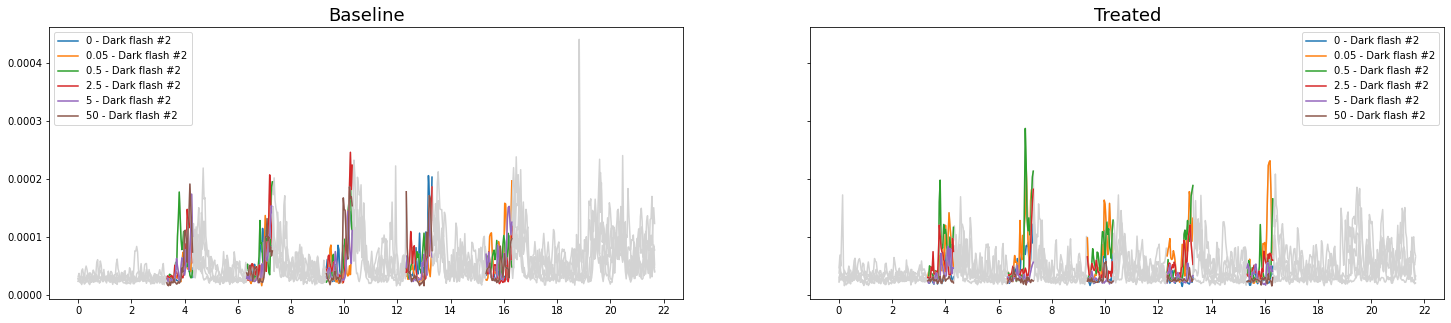

In [99]:
fig, axs = plt.subplots(1, 2, figsize=(25, 5), sharey=True, sharex=True)

gap = 100

for conc, df in dfs['baseline_dfs'].items():
    dflash_start = df[(df.stim_name == 'dark_flash') & (df.stim_num >= 5)].index.values[0]
    depoch_start = df[(df.stim_name == 'dark_epoch') & (df.stim_num == 12)].index.values[0]

    dflash_subdf = df.loc[dflash_start-gap:depoch_start+gap, :]
    x = dflash_subdf.time - dflash_subdf.time.iloc[0]

    y = dflash_subdf.average_dist.copy()
    flash = y.copy()
    flash[dflash_subdf.stim_name != 'dark_flash'] = np.nan

    axs[0].plot(x, y, color='lightgray')
    axs[0].plot(x, flash, label=f'{conc} - Dark flash #2')
    axs[0].set_xticks(np.arange(min(x), max(x)+1, 2.0))
    axs[0].legend()
    axs[0].set_title('Baseline', fontsize=18)

for conc, df in dfs['drugtreated_dfs'].items():
    dflash_start = df[(df.stim_name == 'dark_flash') & (df.stim_num >= 5)].index.values[0]
    depoch_start = df[(df.stim_name == 'dark_epoch') & (df.stim_num == 12)].index.values[0]

    dflash_subdf = df.loc[dflash_start-gap:depoch_start+gap, :]
    x = dflash_subdf.time - dflash_subdf.time.iloc[0]

    y = dflash_subdf.average_dist.copy()
    flash = y.copy()
    flash[dflash_subdf.stim_name != 'dark_flash'] = np.nan

    axs[1].plot(x, y, color='lightgray')
    axs[1].plot(x, flash, label=f'{conc} - Dark flash #2')
    axs[1].set_xticks(np.arange(min(x), max(x)+1, 2.0))
    axs[1].legend()
    axs[1].set_title('Treated', fontsize=18)

plt.savefig(os.path.join(data_folder, f'darkflash2_bd.pdf'))

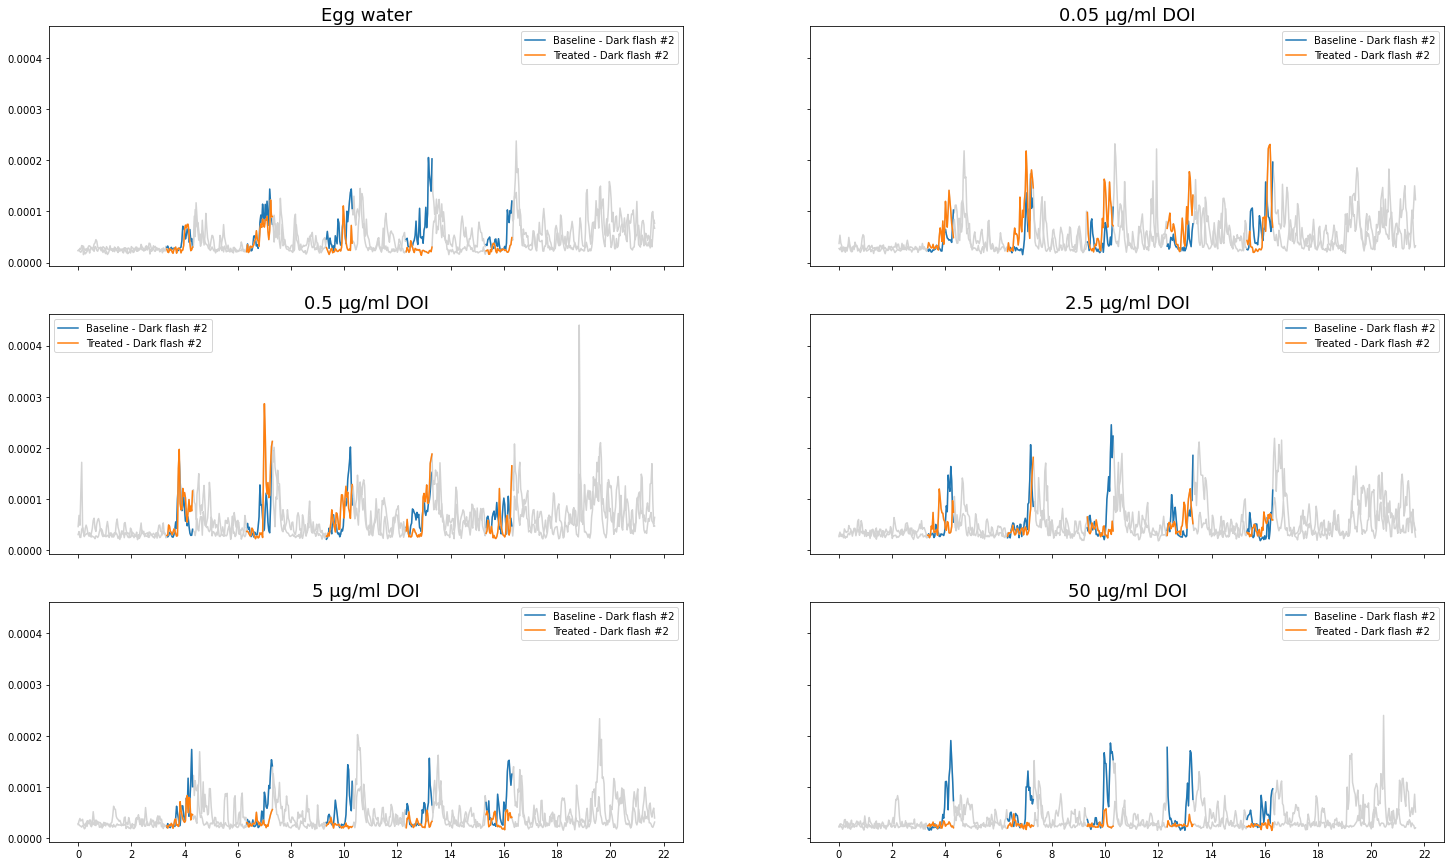

In [100]:
fig, axs = plt.subplots(3, 2, figsize=(25, 15), sharey=True, sharex=True)

gap = 100

for conc, df in dfs['baseline_dfs'].items():
    dflash_start = df[(df.stim_name == 'dark_flash') & (df.stim_num >= 5)].index.values[0]
    depoch_start = df[(df.stim_name == 'dark_epoch') & (df.stim_num == 12)].index.values[0]

    dflash_subdf = df.loc[dflash_start-gap:depoch_start+gap, :]
    x = dflash_subdf.time - dflash_subdf.time.iloc[0]

    y = dflash_subdf.average_dist.copy()
    flash = y.copy()
    flash[dflash_subdf.stim_name != 'dark_flash'] = np.nan

    if conc == 0:
        axs[0, 0].plot(x, y, color='lightgray')
        axs[0, 0].plot(x, flash, label=f'Baseline - Dark flash #2')
        axs[0, 0].set_xticks(np.arange(min(x), max(x)+1, 2.0))
        axs[0, 0].legend()
        axs[0, 0].set_title('Egg water', fontsize=18)
    elif conc == 0.05:
        axs[0, 1].plot(x, y, color='lightgray')
        axs[0, 1].plot(x, flash, label=f'Baseline - Dark flash #2')
        axs[0, 1].set_xticks(np.arange(min(x), max(x)+1, 2.0))
        axs[0, 1].legend()
        axs[0, 1].set_title('0.05 µg/ml DOI', fontsize=18)
    elif conc == 0.5:
        axs[1, 0].plot(x, y, color='lightgray')
        axs[1, 0].plot(x, flash, label=f'Baseline - Dark flash #2')
        axs[1, 0].set_xticks(np.arange(min(x), max(x)+1, 2.0))
        axs[1, 0].legend()
        axs[1, 0].set_title('0.5 µg/ml DOI', fontsize=18)
    elif conc == 2.5:
        axs[1, 1].plot(x, y, color='lightgray')
        axs[1, 1].plot(x, flash, label=f'Baseline - Dark flash #2')
        axs[1, 1].set_xticks(np.arange(min(x), max(x)+1, 2.0))
        axs[1, 1].legend()
        axs[1, 1].set_title('2.5 µg/ml DOI', fontsize=18)
    elif conc == 5:
        axs[2, 0].plot(x, y, color='lightgray')
        axs[2, 0].plot(x, flash, label=f'Baseline - Dark flash #2')
        axs[2, 0].set_xticks(np.arange(min(x), max(x)+1, 2.0))
        axs[2, 0].legend()
        axs[2, 0].set_title('5 µg/ml DOI', fontsize=18)
    elif conc == 50:
        axs[2, 1].plot(x, y, color='lightgray')
        axs[2, 1].plot(x, flash, label=f'Baseline - Dark flash #2')
        axs[2, 1].set_xticks(np.arange(min(x), max(x)+1, 2.0))
        axs[2, 1].legend()
        axs[2, 1].set_title('50 µg/ml DOI', fontsize=18)

for conc, df in dfs['drugtreated_dfs'].items():
    dflash_start = df[(df.stim_name == 'dark_flash') & (df.stim_num >= 5)].index.values[0]
    depoch_start = df[(df.stim_name == 'dark_epoch') & (df.stim_num == 12)].index.values[0]

    dflash_subdf = df.loc[dflash_start-gap:depoch_start+gap, :]
    x = dflash_subdf.time - dflash_subdf.time.iloc[0]

    y = dflash_subdf.average_dist.copy()
    flash = y.copy()
    flash[dflash_subdf.stim_name != 'dark_flash'] = np.nan

    if conc == 0:
        axs[0, 0].plot(x, y, color='lightgray')
        axs[0, 0].plot(x, flash, label=f'Treated - Dark flash #2')
        axs[0, 0].set_xticks(np.arange(min(x), max(x)+1, 2.0))
        axs[0, 0].legend()
        axs[0, 0].set_title('Egg water', fontsize=18)
    elif conc == 0.05:
        axs[0, 1].plot(x, y, color='lightgray')
        axs[0, 1].plot(x, flash, label=f'Treated - Dark flash #2')
        axs[0, 1].set_xticks(np.arange(min(x), max(x)+1, 2.0))
        axs[0, 1].legend()
        axs[0, 1].set_title('0.05 µg/ml DOI', fontsize=18)
    elif conc == 0.5:
        axs[1, 0].plot(x, y, color='lightgray')
        axs[1, 0].plot(x, flash, label=f'Treated - Dark flash #2')
        axs[1, 0].set_xticks(np.arange(min(x), max(x)+1, 2.0))
        axs[1, 0].legend()
        axs[1, 0].set_title('0.5 µg/ml DOI', fontsize=18)
    elif conc == 2.5:
        axs[1, 1].plot(x, y, color='lightgray')
        axs[1, 1].plot(x, flash, label=f'Treated - Dark flash #2')
        axs[1, 1].set_xticks(np.arange(min(x), max(x)+1, 2.0))
        axs[1, 1].legend()
        axs[1, 1].set_title('2.5 µg/ml DOI', fontsize=18)
    elif conc == 5:
        axs[2, 0].plot(x, y, color='lightgray')
        axs[2, 0].plot(x, flash, label=f'Treated - Dark flash #2')
        axs[2, 0].set_xticks(np.arange(min(x), max(x)+1, 2.0))
        axs[2, 0].legend()
        axs[2, 0].set_title('5 µg/ml DOI', fontsize=18)
    elif conc == 50:
        axs[2, 1].plot(x, y, color='lightgray')
        axs[2, 1].plot(x, flash, label=f'Treated - Dark flash #2')
        axs[2, 1].set_xticks(np.arange(min(x), max(x)+1, 2.0))
        axs[2, 1].legend()
        axs[2, 1].set_title('50 µg/ml DOI', fontsize=18)

plt.savefig(os.path.join(data_folder, f'darkflash2_ed.pdf'))

### Light flash #1

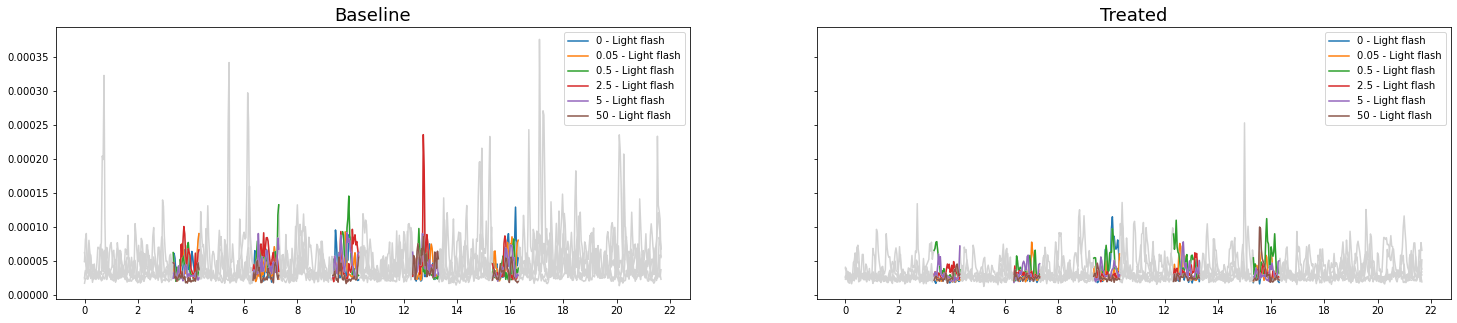

In [101]:
fig, axs = plt.subplots(1, 2, figsize=(25, 5), sharey=True, sharex=True)

gap = 100

for conc, df in dfs['baseline_dfs'].items():
    lflash_start = df[df.stim_name == 'light_flash'].index.values[0]
    lepoch_start = df[(df.stim_name == 'light_epoch') & (df.stim_num == 6)].index.values[0]

    lflash_subdf = df.loc[lflash_start-gap:lepoch_start+gap, :]
    x = lflash_subdf.time - lflash_subdf.time.iloc[0]

    y = lflash_subdf.average_dist.copy()
    flash = y.copy()
    flash[lflash_subdf.stim_name != 'light_flash'] = np.nan

    axs[0].plot(x, y, color='lightgray')
    axs[0].plot(x, flash, label=f'{conc} - Light flash')
    axs[0].set_xticks(np.arange(min(x), max(x)+1, 2.0))
    axs[0].legend()
    axs[0].set_title('Baseline', fontsize=18)

for conc, df in dfs['drugtreated_dfs'].items():
    lflash_start = df[df.stim_name == 'light_flash'].index.values[0]
    lepoch_start = df[(df.stim_name == 'light_epoch') & (df.stim_num == 6)].index.values[0]

    lflash_subdf = df.loc[lflash_start-gap:lepoch_start+gap, :]
    x = lflash_subdf.time - lflash_subdf.time.iloc[0]

    y = lflash_subdf.average_dist.copy()
    flash = y.copy()
    flash[lflash_subdf.stim_name != 'light_flash'] = np.nan

    axs[1].plot(x, y, color='lightgray')
    axs[1].plot(x, flash, label=f'{conc} - Light flash')
    axs[1].set_xticks(np.arange(min(x), max(x)+1, 2.0))
    axs[1].legend()
    axs[1].set_title('Treated', fontsize=18)

plt.savefig(os.path.join(data_folder, f'lightflash_bd.pdf'))

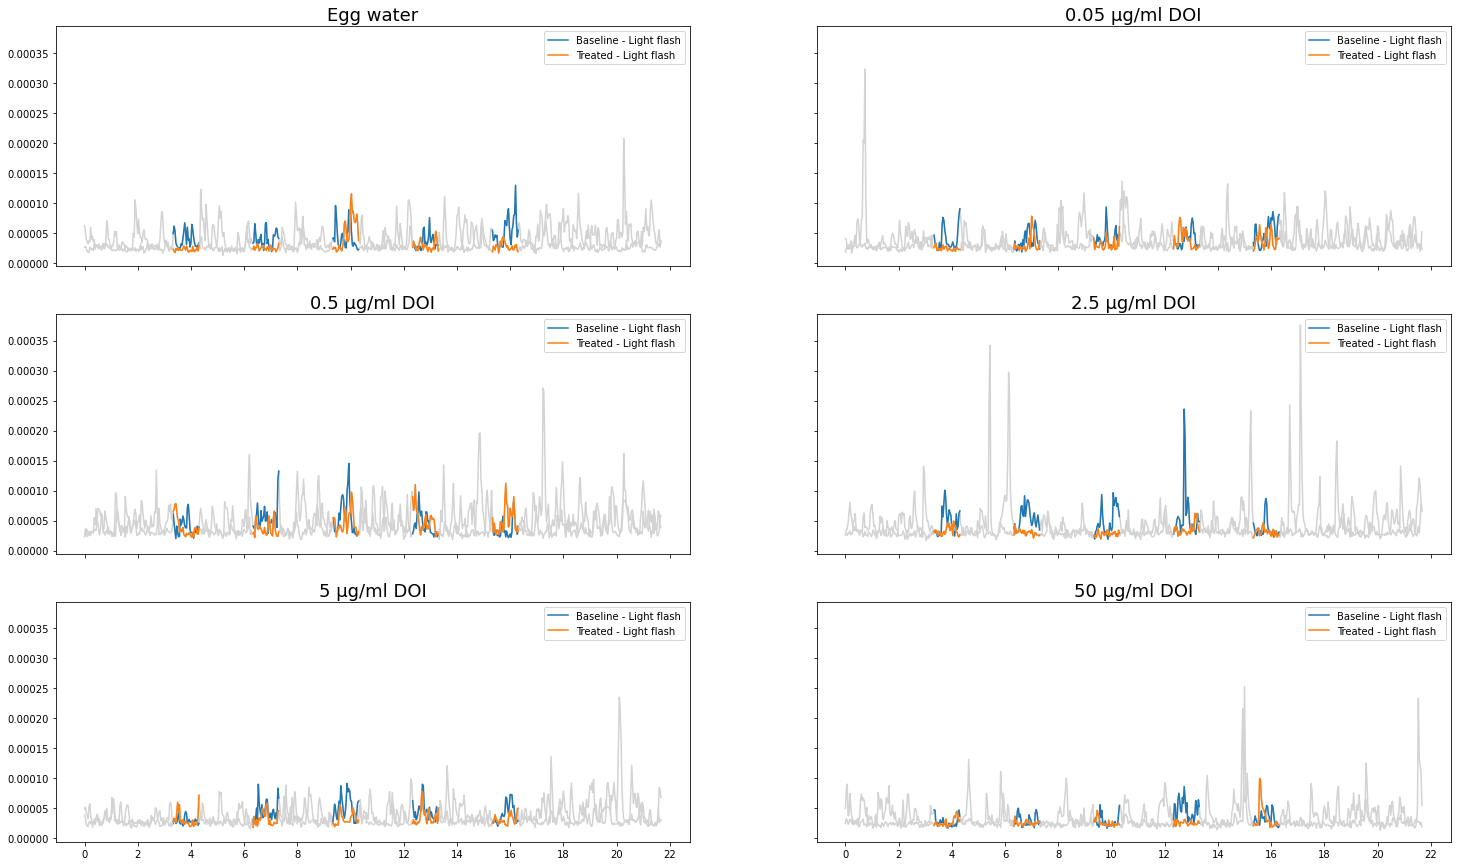

In [102]:
fig, axs = plt.subplots(3, 2, figsize=(25, 15), sharey=True, sharex=True)

gap = 100

for conc, df in dfs['baseline_dfs'].items():
    lflash_start = df[df.stim_name == 'light_flash'].index.values[0]
    lepoch_start = df[(df.stim_name == 'light_epoch') & (df.stim_num == 6)].index.values[0]

    lflash_subdf = df.loc[lflash_start-gap:lepoch_start+gap, :]
    x = lflash_subdf.time - lflash_subdf.time.iloc[0]

    y = lflash_subdf.average_dist.copy()
    flash = y.copy()
    flash[lflash_subdf.stim_name != 'light_flash'] = np.nan

    if conc == 0:
        axs[0, 0].plot(x, y, color='lightgray')
        axs[0, 0].plot(x, flash, label=f'Baseline - Light flash')
        axs[0, 0].set_xticks(np.arange(min(x), max(x)+1, 2.0))
        axs[0, 0].legend()
        axs[0, 0].set_title('Egg water', fontsize=18)
    elif conc == 0.05:
        axs[0, 1].plot(x, y, color='lightgray')
        axs[0, 1].plot(x, flash, label=f'Baseline - Light flash')
        axs[0, 1].set_xticks(np.arange(min(x), max(x)+1, 2.0))
        axs[0, 1].legend()
        axs[0, 1].set_title('0.05 µg/ml DOI', fontsize=18)
    elif conc == 0.5:
        axs[1, 0].plot(x, y, color='lightgray')
        axs[1, 0].plot(x, flash, label=f'Baseline - Light flash')
        axs[1, 0].set_xticks(np.arange(min(x), max(x)+1, 2.0))
        axs[1, 0].legend()
        axs[1, 0].set_title('0.5 µg/ml DOI', fontsize=18)
    elif conc == 2.5:
        axs[1, 1].plot(x, y, color='lightgray')
        axs[1, 1].plot(x, flash, label=f'Baseline - Light flash')
        axs[1, 1].set_xticks(np.arange(min(x), max(x)+1, 2.0))
        axs[1, 1].legend()
        axs[1, 1].set_title('2.5 µg/ml DOI', fontsize=18)
    elif conc == 5:
        axs[2, 0].plot(x, y, color='lightgray')
        axs[2, 0].plot(x, flash, label=f'Baseline - Light flash')
        axs[2, 0].set_xticks(np.arange(min(x), max(x)+1, 2.0))
        axs[2, 0].legend()
        axs[2, 0].set_title('5 µg/ml DOI', fontsize=18)
    elif conc == 50:
        axs[2, 1].plot(x, y, color='lightgray')
        axs[2, 1].plot(x, flash, label=f'Baseline - Light flash')
        axs[2, 1].set_xticks(np.arange(min(x), max(x)+1, 2.0))
        axs[2, 1].legend()
        axs[2, 1].set_title('50 µg/ml DOI', fontsize=18)

for conc, df in dfs['drugtreated_dfs'].items():
    lflash_start = df[df.stim_name == 'light_flash'].index.values[0]
    lepoch_start = df[(df.stim_name == 'light_epoch') & (df.stim_num == 6)].index.values[0]

    lflash_subdf = df.loc[lflash_start-gap:lepoch_start+gap, :]
    x = lflash_subdf.time - lflash_subdf.time.iloc[0]

    y = lflash_subdf.average_dist.copy()
    flash = y.copy()
    flash[lflash_subdf.stim_name != 'light_flash'] = np.nan

    if conc == 0:
        axs[0, 0].plot(x, y, color='lightgray')
        axs[0, 0].plot(x, flash, label=f'Treated - Light flash')
        axs[0, 0].set_xticks(np.arange(min(x), max(x)+1, 2.0))
        axs[0, 0].legend()
        axs[0, 0].set_title('Egg water', fontsize=18)
    elif conc == 0.05:
        axs[0, 1].plot(x, y, color='lightgray')
        axs[0, 1].plot(x, flash, label=f'Treated - Light flash')
        axs[0, 1].set_xticks(np.arange(min(x), max(x)+1, 2.0))
        axs[0, 1].legend()
        axs[0, 1].set_title('0.05 µg/ml DOI', fontsize=18)
    elif conc == 0.5:
        axs[1, 0].plot(x, y, color='lightgray')
        axs[1, 0].plot(x, flash, label=f'Treated - Light flash')
        axs[1, 0].set_xticks(np.arange(min(x), max(x)+1, 2.0))
        axs[1, 0].legend()
        axs[1, 0].set_title('0.5 µg/ml DOI', fontsize=18)
    elif conc == 2.5:
        axs[1, 1].plot(x, y, color='lightgray')
        axs[1, 1].plot(x, flash, label=f'Treated - Light flash')
        axs[1, 1].set_xticks(np.arange(min(x), max(x)+1, 2.0))
        axs[1, 1].legend()
        axs[1, 1].set_title('2.5 µg/ml DOI', fontsize=18)
    elif conc == 5:
        axs[2, 0].plot(x, y, color='lightgray')
        axs[2, 0].plot(x, flash, label=f'Treated - Light flash')
        axs[2, 0].set_xticks(np.arange(min(x), max(x)+1, 2.0))
        axs[2, 0].legend()
        axs[2, 0].set_title('5 µg/ml DOI', fontsize=18)
    elif conc == 50:
        axs[2, 1].plot(x, y, color='lightgray')
        axs[2, 1].plot(x, flash, label=f'Treated - Light flash')
        axs[2, 1].set_xticks(np.arange(min(x), max(x)+1, 2.0))
        axs[2, 1].legend()
        axs[2, 1].set_title('50 µg/ml DOI', fontsize=18)

plt.savefig(os.path.join(data_folder, f'lightflash_ed.pdf'))

### Light flash #2

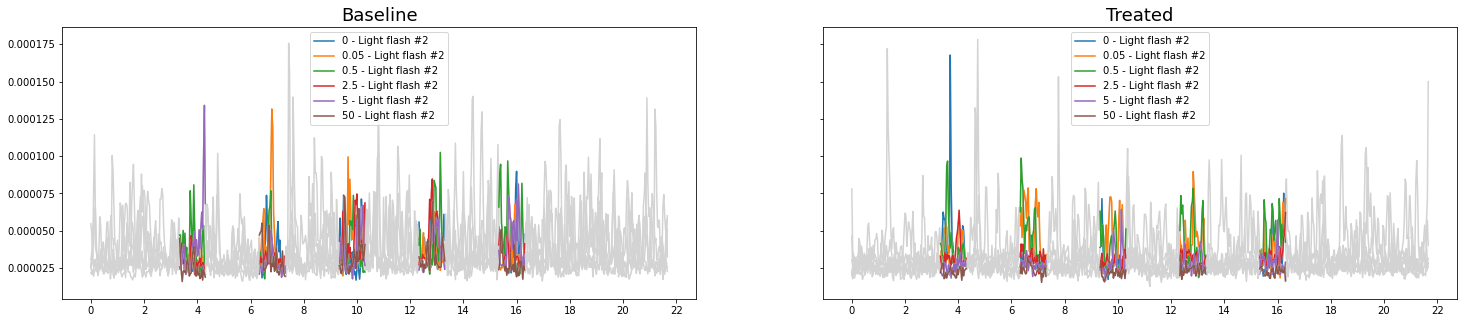

In [103]:
fig, axs = plt.subplots(1, 2, figsize=(25, 5), sharey=True, sharex=True)

gap = 100

for conc, df in dfs['baseline_dfs'].items():
    lflash_start = df[(df.stim_name == 'light_flash') & (df.stim_num >= 5)].index.values[0]
    lepoch_start = df[(df.stim_name == 'light_epoch') & (df.stim_num == 12)].index.values[0]

    lflash_subdf = df.loc[lflash_start-gap:lepoch_start+gap, :]
    x = lflash_subdf.time - lflash_subdf.time.iloc[0]

    y = lflash_subdf.average_dist.copy()
    flash = y.copy()
    flash[lflash_subdf.stim_name != 'light_flash'] = np.nan

    axs[0].plot(x, y, color='lightgray')
    axs[0].plot(x, flash, label=f'{conc} - Light flash #2')
    axs[0].set_xticks(np.arange(min(x), max(x)+1, 2.0))
    axs[0].legend()
    axs[0].set_title('Baseline', fontsize=18)

for conc, df in dfs['drugtreated_dfs'].items():
    lflash_start = df[(df.stim_name == 'light_flash') & (df.stim_num >= 5)].index.values[0]
    lepoch_start = df[(df.stim_name == 'light_epoch') & (df.stim_num == 12)].index.values[0]

    lflash_subdf = df.loc[lflash_start-gap:lepoch_start+gap, :]
    x = lflash_subdf.time - lflash_subdf.time.iloc[0]

    y = lflash_subdf.average_dist.copy()
    flash = y.copy()
    flash[lflash_subdf.stim_name != 'light_flash'] = np.nan

    axs[1].plot(x, y, color='lightgray')
    axs[1].plot(x, flash, label=f'{conc} - Light flash #2')
    axs[1].set_xticks(np.arange(min(x), max(x)+1, 2.0))
    axs[1].legend()
    axs[1].set_title('Treated', fontsize=18)

plt.savefig(os.path.join(data_folder, f'lightflash2_bd.pdf'))

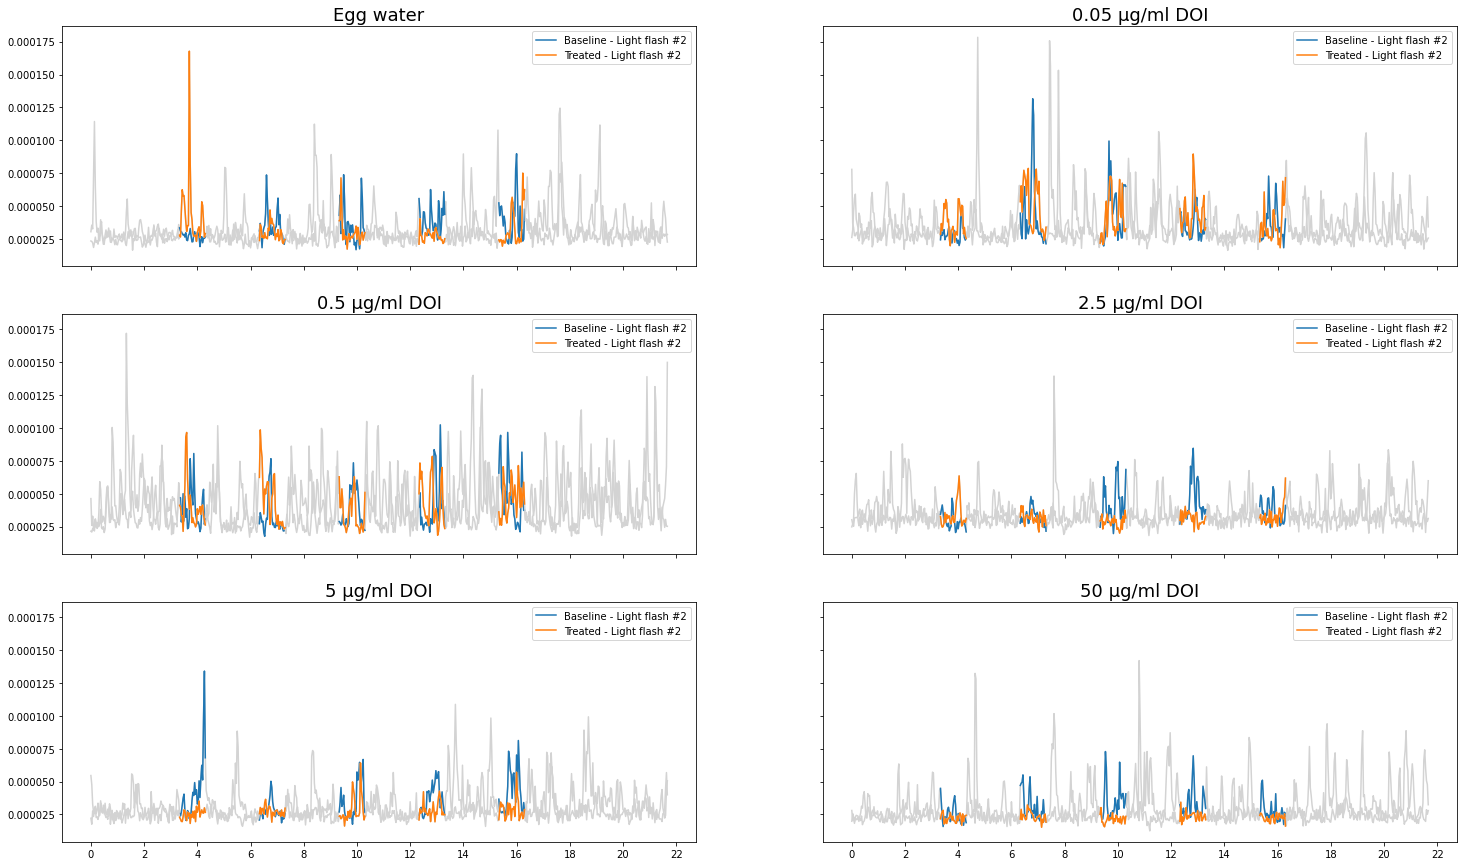

In [104]:
fig, axs = plt.subplots(3, 2, figsize=(25, 15), sharey=True, sharex=True)

gap = 100

for conc, df in dfs['baseline_dfs'].items():
    lflash_start = df[(df.stim_name == 'light_flash') & (df.stim_num >= 5)].index.values[0]
    lepoch_start = df[(df.stim_name == 'light_epoch') & (df.stim_num == 12)].index.values[0]

    lflash_subdf = df.loc[lflash_start-gap:lepoch_start+gap, :]
    x = lflash_subdf.time - lflash_subdf.time.iloc[0]

    y = lflash_subdf.average_dist.copy()
    flash = y.copy()
    flash[lflash_subdf.stim_name != 'light_flash'] = np.nan

    if conc == 0:
        axs[0, 0].plot(x, y, color='lightgray')
        axs[0, 0].plot(x, flash, label=f'Baseline - Light flash #2')
        axs[0, 0].set_xticks(np.arange(min(x), max(x)+1, 2.0))
        axs[0, 0].legend()
        axs[0, 0].set_title('Egg water', fontsize=18)
    elif conc == 0.05:
        axs[0, 1].plot(x, y, color='lightgray')
        axs[0, 1].plot(x, flash, label=f'Baseline - Light flash #2')
        axs[0, 1].set_xticks(np.arange(min(x), max(x)+1, 2.0))
        axs[0, 1].legend()
        axs[0, 1].set_title('0.05 µg/ml DOI', fontsize=18)
    elif conc == 0.5:
        axs[1, 0].plot(x, y, color='lightgray')
        axs[1, 0].plot(x, flash, label=f'Baseline - Light flash #2')
        axs[1, 0].set_xticks(np.arange(min(x), max(x)+1, 2.0))
        axs[1, 0].legend()
        axs[1, 0].set_title('0.5 µg/ml DOI', fontsize=18)
    elif conc == 2.5:
        axs[1, 1].plot(x, y, color='lightgray')
        axs[1, 1].plot(x, flash, label=f'Baseline - Light flash #2')
        axs[1, 1].set_xticks(np.arange(min(x), max(x)+1, 2.0))
        axs[1, 1].legend()
        axs[1, 1].set_title('2.5 µg/ml DOI', fontsize=18)
    elif conc == 5:
        axs[2, 0].plot(x, y, color='lightgray')
        axs[2, 0].plot(x, flash, label=f'Baseline - Light flash #2')
        axs[2, 0].set_xticks(np.arange(min(x), max(x)+1, 2.0))
        axs[2, 0].legend()
        axs[2, 0].set_title('5 µg/ml DOI', fontsize=18)
    elif conc == 50:
        axs[2, 1].plot(x, y, color='lightgray')
        axs[2, 1].plot(x, flash, label=f'Baseline - Light flash #2')
        axs[2, 1].set_xticks(np.arange(min(x), max(x)+1, 2.0))
        axs[2, 1].legend()
        axs[2, 1].set_title('50 µg/ml DOI', fontsize=18)

for conc, df in dfs['drugtreated_dfs'].items():
    lflash_start = df[(df.stim_name == 'light_flash') & (df.stim_num >= 5)].index.values[0]
    lepoch_start = df[(df.stim_name == 'light_epoch') & (df.stim_num == 12)].index.values[0]

    lflash_subdf = df.loc[lflash_start-gap:lepoch_start+gap, :]
    x = lflash_subdf.time - lflash_subdf.time.iloc[0]

    y = lflash_subdf.average_dist.copy()
    flash = y.copy()
    flash[lflash_subdf.stim_name != 'light_flash'] = np.nan

    if conc == 0:
        axs[0, 0].plot(x, y, color='lightgray')
        axs[0, 0].plot(x, flash, label=f'Treated - Light flash #2')
        axs[0, 0].set_xticks(np.arange(min(x), max(x)+1, 2.0))
        axs[0, 0].legend()
        axs[0, 0].set_title('Egg water', fontsize=18)
    elif conc == 0.05:
        axs[0, 1].plot(x, y, color='lightgray')
        axs[0, 1].plot(x, flash, label=f'Treated - Light flash #2')
        axs[0, 1].set_xticks(np.arange(min(x), max(x)+1, 2.0))
        axs[0, 1].legend()
        axs[0, 1].set_title('0.05 µg/ml DOI', fontsize=18)
    elif conc == 0.5:
        axs[1, 0].plot(x, y, color='lightgray')
        axs[1, 0].plot(x, flash, label=f'Treated - Light flash #2')
        axs[1, 0].set_xticks(np.arange(min(x), max(x)+1, 2.0))
        axs[1, 0].legend()
        axs[1, 0].set_title('0.5 µg/ml DOI', fontsize=18)
    elif conc == 2.5:
        axs[1, 1].plot(x, y, color='lightgray')
        axs[1, 1].plot(x, flash, label=f'Treated - Light flash #2')
        axs[1, 1].set_xticks(np.arange(min(x), max(x)+1, 2.0))
        axs[1, 1].legend()
        axs[1, 1].set_title('2.5 µg/ml DOI', fontsize=18)
    elif conc == 5:
        axs[2, 0].plot(x, y, color='lightgray')
        axs[2, 0].plot(x, flash, label=f'Treated - Light flash #2')
        axs[2, 0].set_xticks(np.arange(min(x), max(x)+1, 2.0))
        axs[2, 0].legend()
        axs[2, 0].set_title('5 µg/ml DOI', fontsize=18)
    elif conc == 50:
        axs[2, 1].plot(x, y, color='lightgray')
        axs[2, 1].plot(x, flash, label=f'Treated - Light flash #2')
        axs[2, 1].set_xticks(np.arange(min(x), max(x)+1, 2.0))
        axs[2, 1].legend()
        axs[2, 1].set_title('50 µg/ml DOI', fontsize=18)

plt.savefig(os.path.join(data_folder, f'lightflash2_ed.pdf'))

### Vibration startle - light

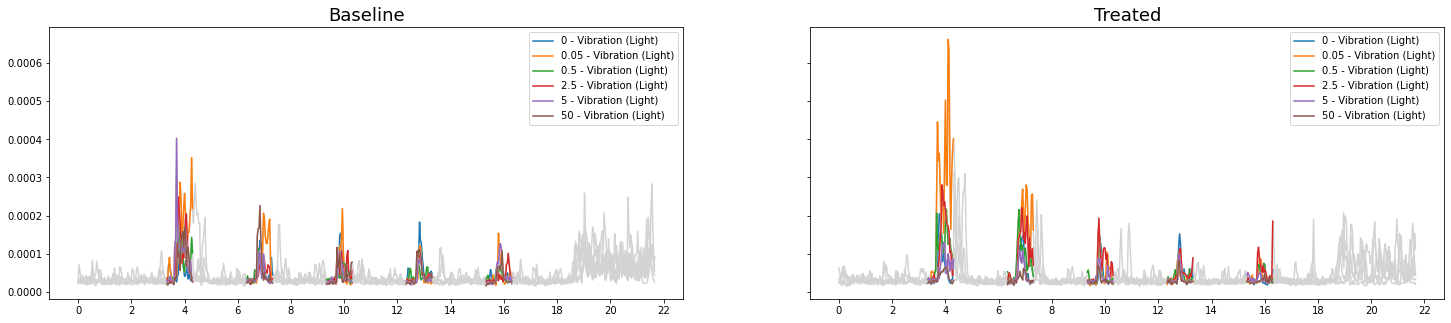

In [106]:
fig, axs = plt.subplots(1, 2, figsize=(25, 5), sharey=True, sharex=True)

gap = 100

for conc, df in dfs['baseline_dfs'].items():
    lvibration_start = df[df.stim_name == 'vibration_startle'].index.values[0]
    depoch_start = df[(df.stim_name == 'dark_epoch') & (df.stim_num == 6)].index.values[0]

    lvibration_subdf = df.loc[lvibration_start-gap:depoch_start+gap, :]
    x = lvibration_subdf.time - lvibration_subdf.time.iloc[0]

    y = lvibration_subdf.average_dist.copy()
    vibration = y.copy()
    vibration[lvibration_subdf.stim_name != 'vibration_startle'] = np.nan

    axs[0].plot(x, y, color='lightgray')
    axs[0].plot(x, vibration, label=f'{conc} - Vibration (Light)')
    axs[0].set_xticks(np.arange(min(x), max(x)+1, 2.0))
    axs[0].legend()
    axs[0].set_title('Baseline', fontsize=18)

for conc, df in dfs['drugtreated_dfs'].items():
    lvibration_start = df[df.stim_name == 'vibration_startle'].index.values[0]
    depoch_start = df[(df.stim_name == 'dark_epoch') & (df.stim_num == 6)].index.values[0]

    lvibration_subdf = df.loc[lvibration_start-gap:depoch_start+gap, :]
    x = lvibration_subdf.time - lvibration_subdf.time.iloc[0]

    y = lvibration_subdf.average_dist.copy()
    vibration = y.copy()
    vibration[lvibration_subdf.stim_name != 'vibration_startle'] = np.nan

    axs[1].plot(x, y, color='lightgray')
    axs[1].plot(x, vibration, label=f'{conc} - Vibration (Light)')
    axs[1].set_xticks(np.arange(min(x), max(x)+1, 2.0))
    axs[1].legend()
    axs[1].set_title('Treated', fontsize=18)

plt.savefig(os.path.join(data_folder, f'vibrationlight_bd.pdf'))

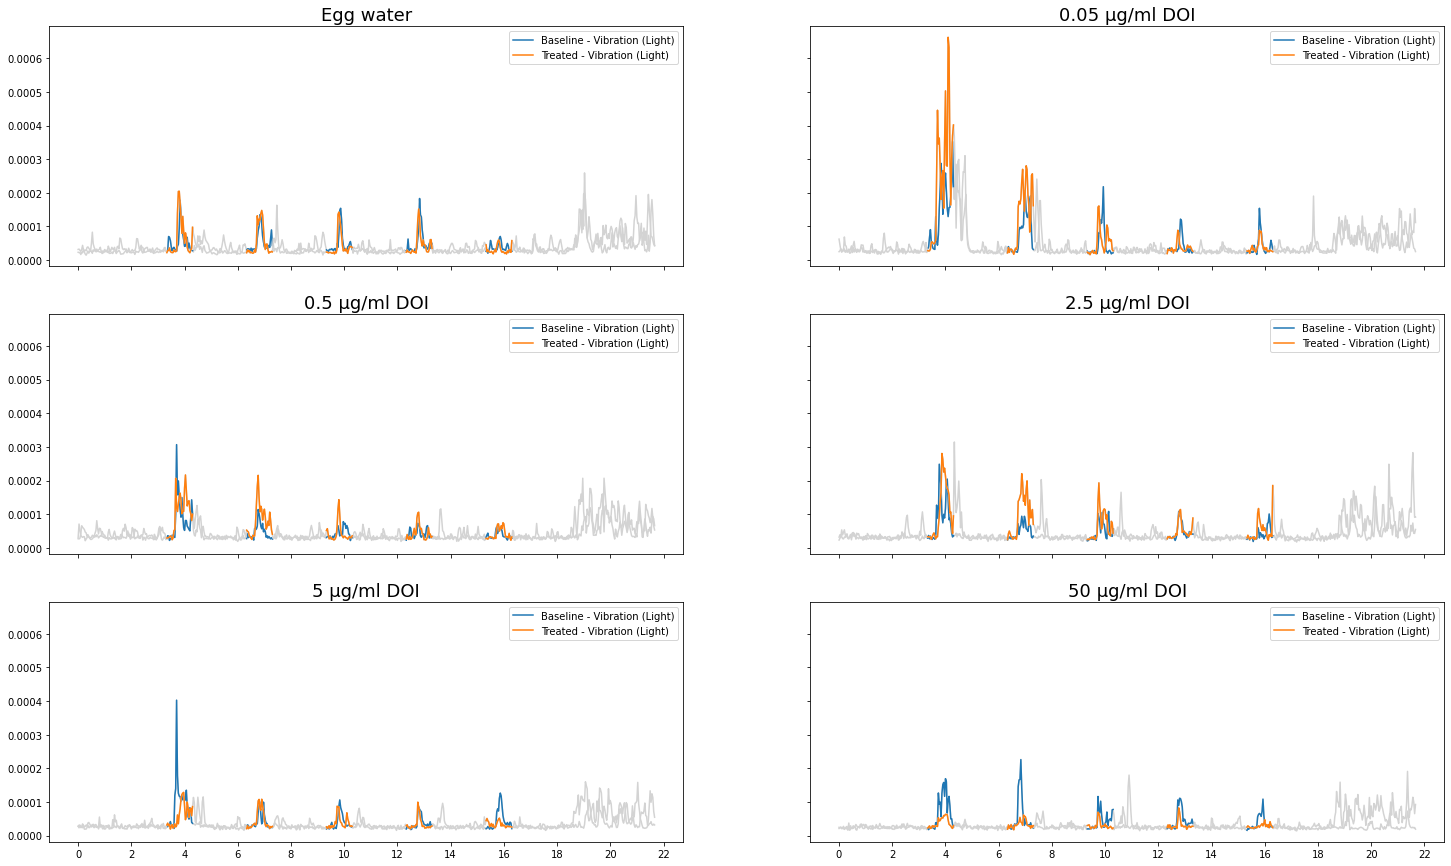

In [107]:
fig, axs = plt.subplots(3, 2, figsize=(25, 15), sharey=True, sharex=True)

gap = 100

for conc, df in dfs['baseline_dfs'].items():
    lvibration_start = df[df.stim_name == 'vibration_startle'].index.values[0]
    depoch_start = df[(df.stim_name == 'dark_epoch') & (df.stim_num == 6)].index.values[0]

    lvibration_subdf = df.loc[lvibration_start-gap:depoch_start+gap, :]
    x = lvibration_subdf.time - lvibration_subdf.time.iloc[0]

    y = lvibration_subdf.average_dist.copy()
    vibration = y.copy()
    vibration[lvibration_subdf.stim_name != 'vibration_startle'] = np.nan

    if conc == 0:
        axs[0, 0].plot(x, y, color='lightgray')
        axs[0, 0].plot(x, vibration, label=f'Baseline - Vibration (Light)')
        axs[0, 0].set_xticks(np.arange(min(x), max(x)+1, 2.0))
        axs[0, 0].legend()
        axs[0, 0].set_title('Egg water', fontsize=18)
    elif conc == 0.05:
        axs[0, 1].plot(x, y, color='lightgray')
        axs[0, 1].plot(x, vibration, label=f'Baseline - Vibration (Light)')
        axs[0, 1].set_xticks(np.arange(min(x), max(x)+1, 2.0))
        axs[0, 1].legend()
        axs[0, 1].set_title('0.05 µg/ml DOI', fontsize=18)
    elif conc == 0.5:
        axs[1, 0].plot(x, y, color='lightgray')
        axs[1, 0].plot(x, vibration, label=f'Baseline - Vibration (Light)')
        axs[1, 0].set_xticks(np.arange(min(x), max(x)+1, 2.0))
        axs[1, 0].legend()
        axs[1, 0].set_title('0.5 µg/ml DOI', fontsize=18)
    elif conc == 2.5:
        axs[1, 1].plot(x, y, color='lightgray')
        axs[1, 1].plot(x, vibration, label=f'Baseline - Vibration (Light)')
        axs[1, 1].set_xticks(np.arange(min(x), max(x)+1, 2.0))
        axs[1, 1].legend()
        axs[1, 1].set_title('2.5 µg/ml DOI', fontsize=18)
    elif conc == 5:
        axs[2, 0].plot(x, y, color='lightgray')
        axs[2, 0].plot(x, vibration, label=f'Baseline - Vibration (Light)')
        axs[2, 0].set_xticks(np.arange(min(x), max(x)+1, 2.0))
        axs[2, 0].legend()
        axs[2, 0].set_title('5 µg/ml DOI', fontsize=18)
    elif conc == 50:
        axs[2, 1].plot(x, y, color='lightgray')
        axs[2, 1].plot(x, vibration, label=f'Baseline - Vibration (Light)')
        axs[2, 1].set_xticks(np.arange(min(x), max(x)+1, 2.0))
        axs[2, 1].legend()
        axs[2, 1].set_title('50 µg/ml DOI', fontsize=18)

for conc, df in dfs['drugtreated_dfs'].items():
    lvibration_start = df[df.stim_name == 'vibration_startle'].index.values[0]
    depoch_start = df[(df.stim_name == 'dark_epoch') & (df.stim_num == 6)].index.values[0]

    lvibration_subdf = df.loc[lvibration_start-gap:depoch_start+gap, :]
    x = lvibration_subdf.time - lvibration_subdf.time.iloc[0]

    y = lvibration_subdf.average_dist.copy()
    vibration = y.copy()
    vibration[lvibration_subdf.stim_name != 'vibration_startle'] = np.nan

    if conc == 0:
        axs[0, 0].plot(x, y, color='lightgray')
        axs[0, 0].plot(x, vibration, label=f'Treated - Vibration (Light)')
        axs[0, 0].set_xticks(np.arange(min(x), max(x)+1, 2.0))
        axs[0, 0].legend()
        axs[0, 0].set_title('Egg water', fontsize=18)
    elif conc == 0.05:
        axs[0, 1].plot(x, y, color='lightgray')
        axs[0, 1].plot(x, vibration, label=f'Treated - Vibration (Light)')
        axs[0, 1].set_xticks(np.arange(min(x), max(x)+1, 2.0))
        axs[0, 1].legend()
        axs[0, 1].set_title('0.05 µg/ml DOI', fontsize=18)
    elif conc == 0.5:
        axs[1, 0].plot(x, y, color='lightgray')
        axs[1, 0].plot(x, vibration, label=f'Treated - Vibration (Light)')
        axs[1, 0].set_xticks(np.arange(min(x), max(x)+1, 2.0))
        axs[1, 0].legend()
        axs[1, 0].set_title('0.5 µg/ml DOI', fontsize=18)
    elif conc == 2.5:
        axs[1, 1].plot(x, y, color='lightgray')
        axs[1, 1].plot(x, vibration, label=f'Treated - Vibration (Light)')
        axs[1, 1].set_xticks(np.arange(min(x), max(x)+1, 2.0))
        axs[1, 1].legend()
        axs[1, 1].set_title('2.5 µg/ml DOI', fontsize=18)
    elif conc == 5:
        axs[2, 0].plot(x, y, color='lightgray')
        axs[2, 0].plot(x, vibration, label=f'Treated - Vibration (Light)')
        axs[2, 0].set_xticks(np.arange(min(x), max(x)+1, 2.0))
        axs[2, 0].legend()
        axs[2, 0].set_title('5 µg/ml DOI', fontsize=18)
    elif conc == 50:
        axs[2, 1].plot(x, y, color='lightgray')
        axs[2, 1].plot(x, vibration, label=f'Treated - Vibration (Light)')
        axs[2, 1].set_xticks(np.arange(min(x), max(x)+1, 2.0))
        axs[2, 1].legend()
        axs[2, 1].set_title('50 µg/ml DOI', fontsize=18)

plt.savefig(os.path.join(data_folder, f'vibrationlight_ed.pdf'))

### Vibration startle - dark

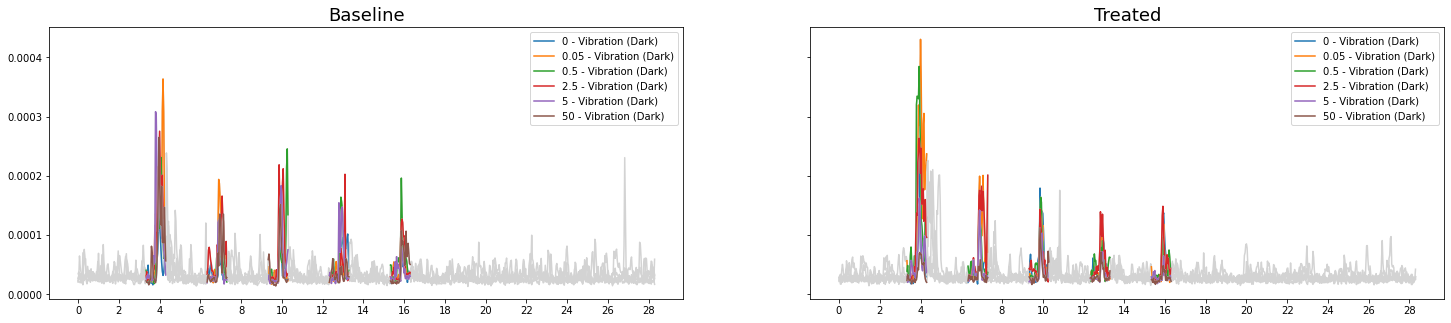

In [108]:
fig, axs = plt.subplots(1, 2, figsize=(25, 5), sharey=True, sharex=True)

gap = 100

for conc, df in dfs['baseline_dfs'].items():
    dvibration_start = df[(df.stim_name == 'vibration_startle') & (df.flash_color != 'white')].index.values[0]

    dvibration_subdf = df.loc[dvibration_start-gap:, :]
    x = dvibration_subdf.time - dvibration_subdf.time.iloc[0]

    y = dvibration_subdf.average_dist.copy()
    vibration = y.copy()
    vibration[dvibration_subdf.stim_name != 'vibration_startle'] = np.nan

    axs[0].plot(x, y, color='lightgray')
    axs[0].plot(x, vibration, label=f'{conc} - Vibration (Dark)')
    axs[0].set_xticks(np.arange(min(x), max(x)+1, 2.0))
    axs[0].legend()
    axs[0].set_title('Baseline', fontsize=18)

for conc, df in dfs['drugtreated_dfs'].items():
    dvibration_start = df[(df.stim_name == 'vibration_startle') & (df.flash_color != 'white')].index.values[0]

    dvibration_subdf = df.loc[dvibration_start-gap:, :]
    x = dvibration_subdf.time - dvibration_subdf.time.iloc[0]

    y = dvibration_subdf.average_dist.copy()
    vibration = y.copy()
    vibration[dvibration_subdf.stim_name != 'vibration_startle'] = np.nan

    axs[1].plot(x, y, color='lightgray')
    axs[1].plot(x, vibration, label=f'{conc} - Vibration (Dark)')
    axs[1].set_xticks(np.arange(min(x), max(x)+1, 2.0))
    axs[1].legend()
    axs[1].set_title('Treated', fontsize=18)

plt.savefig(os.path.join(data_folder, f'vibrationdark_bd.pdf'))

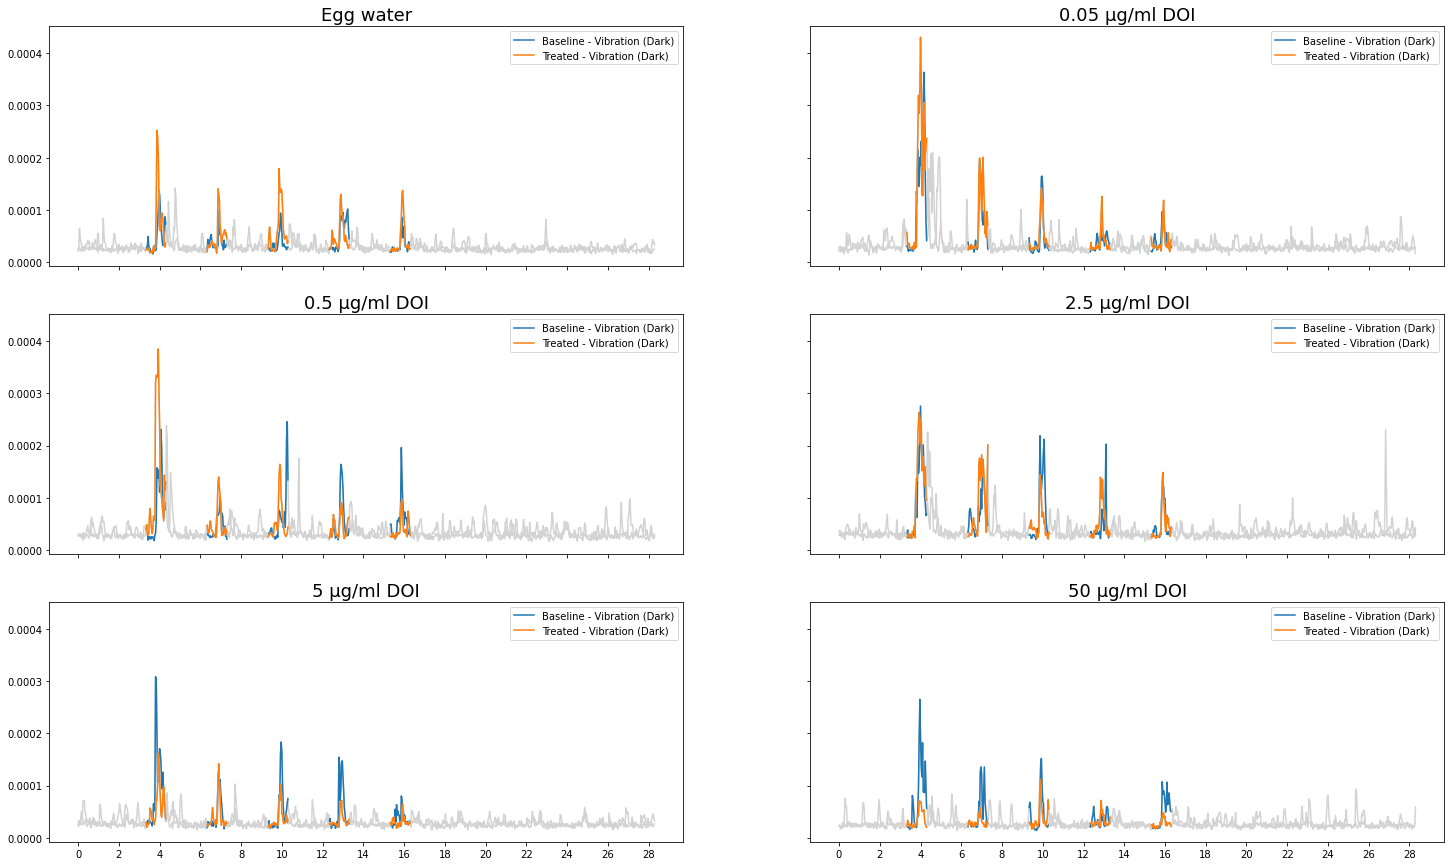

In [109]:
fig, axs = plt.subplots(3, 2, figsize=(25, 15), sharey=True, sharex=True)

gap = 100

for conc, df in dfs['baseline_dfs'].items():
    dvibration_start = df[(df.stim_name == 'vibration_startle') & (df.flash_color != 'white')].index.values[0]

    dvibration_subdf = df.loc[dvibration_start-gap:, :]
    x = dvibration_subdf.time - dvibration_subdf.time.iloc[0]

    y = dvibration_subdf.average_dist.copy()
    vibration = y.copy()
    vibration[dvibration_subdf.stim_name != 'vibration_startle'] = np.nan

    if conc == 0:
        axs[0, 0].plot(x, y, color='lightgray')
        axs[0, 0].plot(x, vibration, label=f'Baseline - Vibration (Dark)')
        axs[0, 0].set_xticks(np.arange(min(x), max(x)+1, 2.0))
        axs[0, 0].legend()
        axs[0, 0].set_title('Egg water', fontsize=18)
    elif conc == 0.05:
        axs[0, 1].plot(x, y, color='lightgray')
        axs[0, 1].plot(x, vibration, label=f'Baseline - Vibration (Dark)')
        axs[0, 1].set_xticks(np.arange(min(x), max(x)+1, 2.0))
        axs[0, 1].legend()
        axs[0, 1].set_title('0.05 µg/ml DOI', fontsize=18)
    elif conc == 0.5:
        axs[1, 0].plot(x, y, color='lightgray')
        axs[1, 0].plot(x, vibration, label=f'Baseline - Vibration (Dark)')
        axs[1, 0].set_xticks(np.arange(min(x), max(x)+1, 2.0))
        axs[1, 0].legend()
        axs[1, 0].set_title('0.5 µg/ml DOI', fontsize=18)
    elif conc == 2.5:
        axs[1, 1].plot(x, y, color='lightgray')
        axs[1, 1].plot(x, vibration, label=f'Baseline - Vibration (Dark)')
        axs[1, 1].set_xticks(np.arange(min(x), max(x)+1, 2.0))
        axs[1, 1].legend()
        axs[1, 1].set_title('2.5 µg/ml DOI', fontsize=18)
    elif conc == 5:
        axs[2, 0].plot(x, y, color='lightgray')
        axs[2, 0].plot(x, vibration, label=f'Baseline - Vibration (Dark)')
        axs[2, 0].set_xticks(np.arange(min(x), max(x)+1, 2.0))
        axs[2, 0].legend()
        axs[2, 0].set_title('5 µg/ml DOI', fontsize=18)
    elif conc == 50:
        axs[2, 1].plot(x, y, color='lightgray')
        axs[2, 1].plot(x, vibration, label=f'Baseline - Vibration (Dark)')
        axs[2, 1].set_xticks(np.arange(min(x), max(x)+1, 2.0))
        axs[2, 1].legend()
        axs[2, 1].set_title('50 µg/ml DOI', fontsize=18)

for conc, df in dfs['drugtreated_dfs'].items():
    dvibration_start = df[(df.stim_name == 'vibration_startle') & (df.flash_color != 'white')].index.values[0]

    dvibration_subdf = df.loc[dvibration_start-gap:, :]
    x = dvibration_subdf.time - dvibration_subdf.time.iloc[0]

    y = dvibration_subdf.average_dist.copy()
    vibration = y.copy()
    vibration[dvibration_subdf.stim_name != 'vibration_startle'] = np.nan

    if conc == 0:
        axs[0, 0].plot(x, y, color='lightgray')
        axs[0, 0].plot(x, vibration, label=f'Treated - Vibration (Dark)')
        axs[0, 0].set_xticks(np.arange(min(x), max(x)+1, 2.0))
        axs[0, 0].legend()
        axs[0, 0].set_title('Egg water', fontsize=18)
    elif conc == 0.05:
        axs[0, 1].plot(x, y, color='lightgray')
        axs[0, 1].plot(x, vibration, label=f'Treated - Vibration (Dark)')
        axs[0, 1].set_xticks(np.arange(min(x), max(x)+1, 2.0))
        axs[0, 1].legend()
        axs[0, 1].set_title('0.05 µg/ml DOI', fontsize=18)
    elif conc == 0.5:
        axs[1, 0].plot(x, y, color='lightgray')
        axs[1, 0].plot(x, vibration, label=f'Treated - Vibration (Dark)')
        axs[1, 0].set_xticks(np.arange(min(x), max(x)+1, 2.0))
        axs[1, 0].legend()
        axs[1, 0].set_title('0.5 µg/ml DOI', fontsize=18)
    elif conc == 2.5:
        axs[1, 1].plot(x, y, color='lightgray')
        axs[1, 1].plot(x, vibration, label=f'Treated - Vibration (Dark)')
        axs[1, 1].set_xticks(np.arange(min(x), max(x)+1, 2.0))
        axs[1, 1].legend()
        axs[1, 1].set_title('2.5 µg/ml DOI', fontsize=18)
    elif conc == 5:
        axs[2, 0].plot(x, y, color='lightgray')
        axs[2, 0].plot(x, vibration, label=f'Treated - Vibration (Dark)')
        axs[2, 0].set_xticks(np.arange(min(x), max(x)+1, 2.0))
        axs[2, 0].legend()
        axs[2, 0].set_title('5 µg/ml DOI', fontsize=18)
    elif conc == 50:
        axs[2, 1].plot(x, y, color='lightgray')
        axs[2, 1].plot(x, vibration, label=f'Treated - Vibration (Dark)')
        axs[2, 1].set_xticks(np.arange(min(x), max(x)+1, 2.0))
        axs[2, 1].legend()
        axs[2, 1].set_title('50 µg/ml DOI', fontsize=18)

plt.savefig(os.path.join(data_folder, f'vibrationdark_ed.pdf'))

## Peak startle response of average_dist

### Dark flash

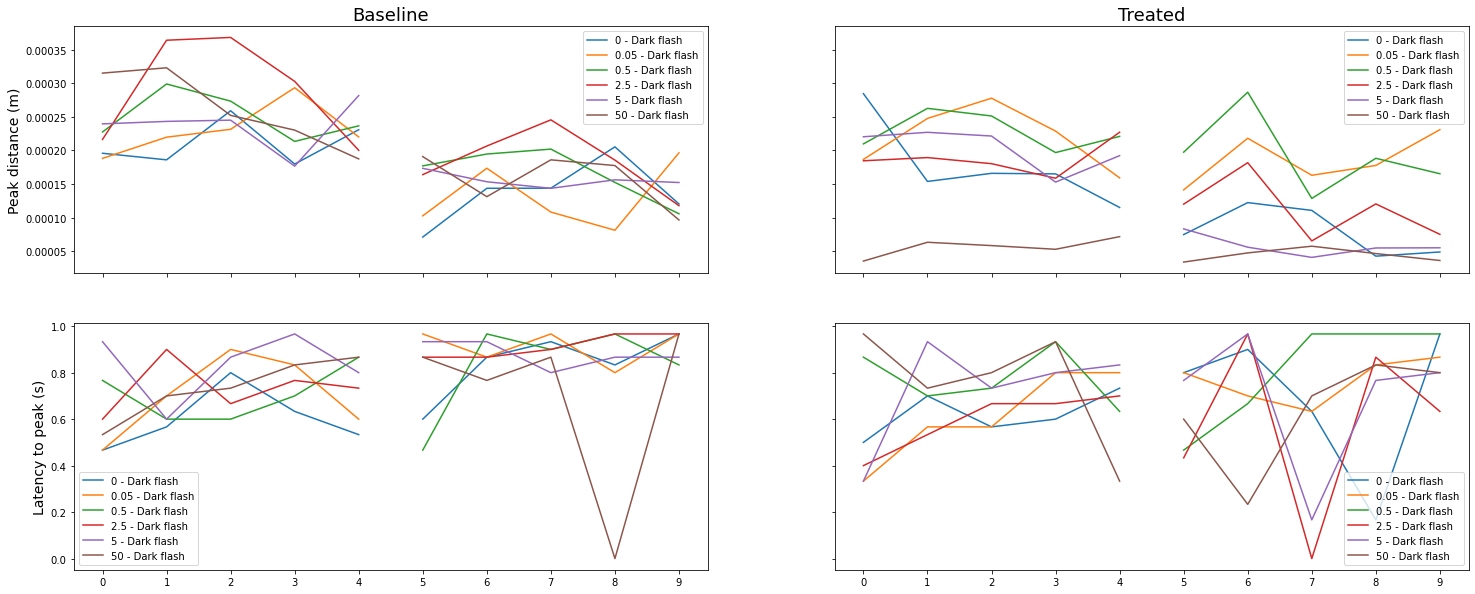

In [116]:
fig, axs = plt.subplots(2, 2, figsize=(25, 10), sharey='row', sharex=True)

for conc, df in dfs['baseline_dfs'].items():
    stim_nums = df[df.stim_name == 'dark_flash'].stim_num.unique()

    x = []
    peaks = []
    latencies = []

    for num in stim_nums:
        if num == 5:
            peaks.append(np.nan)
            latencies.append(np.nan)
            x.append(np.nan)

        trial = df[(df.stim_name == 'dark_flash') & (df.stim_num == num)]
        peak_dist = trial.average_dist.max()
        peak_index = trial.average_dist.idxmax()
        latency = trial.loc[peak_index, 'time'] - trial.iloc[0, 0]

        peaks.append(peak_dist)
        latencies.append(latency)
        x.append(num)

    axs[0, 0].plot(x, peaks, label=f'{conc} - Dark flash')
    axs[0, 0].set_xticks(np.arange(min(x), max(x)+1, 1))
    axs[0, 0].legend()

    axs[1, 0].plot(x, latencies, label=f'{conc} - Dark flash')
    axs[1, 0].set_xticks(np.arange(min(x), max(x)+1, 1))
    axs[1, 0].legend()

for conc, df in dfs['drugtreated_dfs'].items():
    stim_nums = df[df.stim_name == 'dark_flash'].stim_num.unique()

    x = []
    peaks = []
    latencies = []

    for num in stim_nums:
        if num == 5:
            peaks.append(np.nan)
            latencies.append(np.nan)
            x.append(np.nan)

        trial = df[(df.stim_name == 'dark_flash') & (df.stim_num == num)]
        peak_dist = trial.average_dist.max()
        peak_index = trial.average_dist.idxmax()
        latency = trial.loc[peak_index, 'time'] - trial.iloc[0, 0]

        peaks.append(peak_dist)
        latencies.append(latency)
        x.append(num)

    axs[0, 1].plot(x, peaks, label=f'{conc} - Dark flash')
    axs[0, 1].set_xticks(np.arange(min(x), max(x)+1, 1))
    axs[0, 1].legend()

    axs[1, 1].plot(x, latencies, label=f'{conc} - Dark flash')
    axs[1, 1].set_xticks(np.arange(min(x), max(x)+1, 1))
    axs[1, 1].legend()

axs[0, 0].set_title('Baseline', fontsize=18)
axs[0, 1].set_title('Treated', fontsize=18)
axs[0, 0].set_ylabel('Peak distance (m)', fontsize=14)
axs[1, 0].set_ylabel('Latency to peak (s)', fontsize=14)

plt.savefig(os.path.join(data_folder, f'darkflash_adaptation_bd.pdf'))

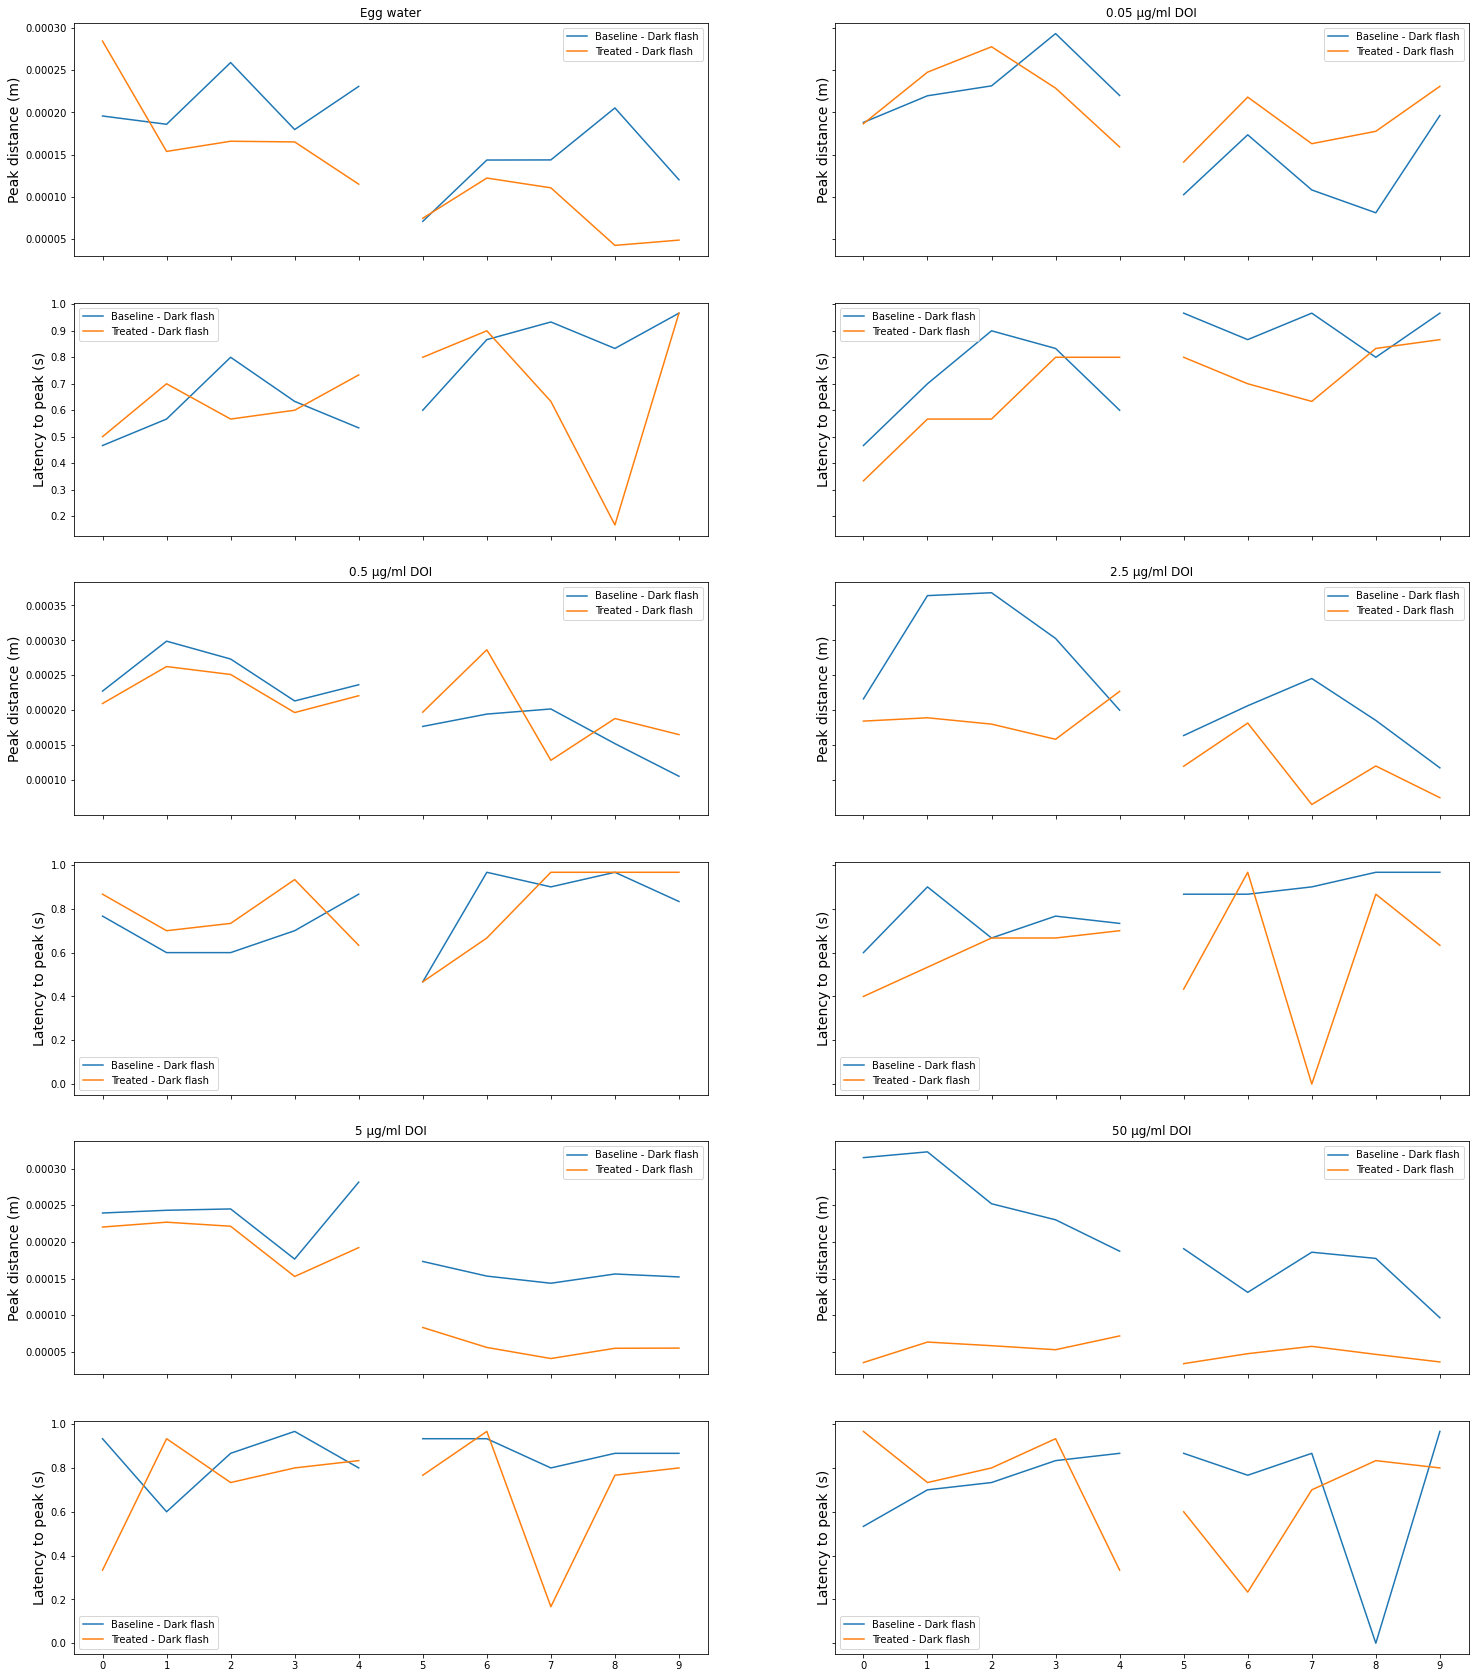

In [118]:
fig, axs = plt.subplots(6, 2, figsize=(25, 30), sharey='row', sharex=True)

for conc, df in dfs['baseline_dfs'].items():
    stim_nums = df[df.stim_name == 'dark_flash'].stim_num.unique()

    x = []
    peaks = []
    latencies = []

    for num in stim_nums:
        if num == 5:
            peaks.append(np.nan)
            latencies.append(np.nan)
            x.append(np.nan)

        trial = df[(df.stim_name == 'dark_flash') & (df.stim_num == num)]
        peak_dist = trial.average_dist.max()
        peak_index = trial.average_dist.idxmax()
        latency = trial.loc[peak_index, 'time'] - trial.iloc[0, 0]

        peaks.append(peak_dist)
        latencies.append(latency)
        x.append(num)

    if conc == 0:
        axs[0, 0].plot(x, peaks, label=f'Baseline - Dark flash')
        axs[0, 0].set_xticks(np.arange(min(x), max(x)+1, 1))
        axs[0, 0].legend()
        axs[0, 0].set_title('Egg water')
        axs[0, 0].set_ylabel('Peak distance (m)', fontsize=14)

        axs[1, 0].plot(x, latencies, label=f'Baseline - Dark flash')
        axs[1, 0].set_xticks(np.arange(min(x), max(x)+1, 1))
        axs[1, 0].legend()
        axs[1, 0].set_ylabel('Latency to peak (s)', fontsize=14)
    elif conc == 0.05:
        axs[0, 1].plot(x, peaks, label=f'Baseline - Dark flash')
        axs[0, 1].set_xticks(np.arange(min(x), max(x)+1, 1))
        axs[0, 1].legend()
        axs[0, 1].set_title('0.05 µg/ml DOI')
        axs[0, 1].set_ylabel('Peak distance (m)', fontsize=14)

        axs[1, 1].plot(x, latencies, label=f'Baseline - Dark flash')
        axs[1, 1].set_xticks(np.arange(min(x), max(x)+1, 1))
        axs[1, 1].legend()
        axs[1, 1].set_ylabel('Latency to peak (s)', fontsize=14)
    elif conc == 0.5:
        axs[2, 0].plot(x, peaks, label=f'Baseline - Dark flash')
        axs[2, 0].set_xticks(np.arange(min(x), max(x)+1, 1))
        axs[2, 0].legend()
        axs[2, 0].set_title('0.5 µg/ml DOI')
        axs[2, 0].set_ylabel('Peak distance (m)', fontsize=14)

        axs[3, 0].plot(x, latencies, label=f'Baseline - Dark flash')
        axs[3, 0].set_xticks(np.arange(min(x), max(x)+1, 1))
        axs[3, 0].legend()
        axs[3, 0].set_ylabel('Latency to peak (s)', fontsize=14)
    elif conc == 2.5:
        axs[2, 1].plot(x, peaks, label=f'Baseline - Dark flash')
        axs[2, 1].set_xticks(np.arange(min(x), max(x)+1, 1))
        axs[2, 1].legend()
        axs[2, 1].set_title('2.5 µg/ml DOI')
        axs[2, 1].set_ylabel('Peak distance (m)', fontsize=14)

        axs[3, 1].plot(x, latencies, label=f'Baseline - Dark flash')
        axs[3, 1].set_xticks(np.arange(min(x), max(x)+1, 1))
        axs[3, 1].legend()
        axs[3, 1].set_ylabel('Latency to peak (s)', fontsize=14)
    elif conc == 5:
        axs[4, 0].plot(x, peaks, label=f'Baseline - Dark flash')
        axs[4, 0].set_xticks(np.arange(min(x), max(x)+1, 1))
        axs[4, 0].legend()
        axs[4, 0].set_title('5 µg/ml DOI')
        axs[4, 0].set_ylabel('Peak distance (m)', fontsize=14)

        axs[5, 0].plot(x, latencies, label=f'Baseline - Dark flash')
        axs[5, 0].set_xticks(np.arange(min(x), max(x)+1, 1))
        axs[5, 0].legend()
        axs[5, 0].set_ylabel('Latency to peak (s)', fontsize=14)
    elif conc == 50:
        axs[4, 1].plot(x, peaks, label=f'Baseline - Dark flash')
        axs[4, 1].set_xticks(np.arange(min(x), max(x)+1, 1))
        axs[4, 1].legend()
        axs[4, 1].set_title('50 µg/ml DOI')
        axs[4, 1].set_ylabel('Peak distance (m)', fontsize=14)

        axs[5, 1].plot(x, latencies, label=f'Baseline - Dark flash')
        axs[5, 1].set_xticks(np.arange(min(x), max(x)+1, 1))
        axs[5, 1].legend()
        axs[5, 1].set_ylabel('Latency to peak (s)', fontsize=14)

for conc, df in dfs['drugtreated_dfs'].items():
    stim_nums = df[df.stim_name == 'dark_flash'].stim_num.unique()

    x = []
    peaks = []
    latencies = []

    for num in stim_nums:
        if num == 5:
            peaks.append(np.nan)
            latencies.append(np.nan)
            x.append(np.nan)

        trial = df[(df.stim_name == 'dark_flash') & (df.stim_num == num)]
        peak_dist = trial.average_dist.max()
        peak_index = trial.average_dist.idxmax()
        latency = trial.loc[peak_index, 'time'] - trial.iloc[0, 0]

        peaks.append(peak_dist)
        latencies.append(latency)
        x.append(num)

    if conc == 0:
        axs[0, 0].plot(x, peaks, label=f'Treated - Dark flash')
        axs[0, 0].set_xticks(np.arange(min(x), max(x)+1, 1))
        axs[0, 0].legend()
        axs[0, 0].set_title('Egg water')
        axs[0, 0].set_ylabel('Peak distance (m)', fontsize=14)

        axs[1, 0].plot(x, latencies, label=f'Treated - Dark flash')
        axs[1, 0].set_xticks(np.arange(min(x), max(x)+1, 1))
        axs[1, 0].legend()
        axs[1, 0].set_ylabel('Latency to peak (s)', fontsize=14)
    elif conc == 0.05:
        axs[0, 1].plot(x, peaks, label=f'Treated - Dark flash')
        axs[0, 1].set_xticks(np.arange(min(x), max(x)+1, 1))
        axs[0, 1].legend()
        axs[0, 1].set_title('0.05 µg/ml DOI')
        axs[0, 1].set_ylabel('Peak distance (m)', fontsize=14)

        axs[1, 1].plot(x, latencies, label=f'Treated - Dark flash')
        axs[1, 1].set_xticks(np.arange(min(x), max(x)+1, 1))
        axs[1, 1].legend()
        axs[1, 1].set_ylabel('Latency to peak (s)', fontsize=14)
    elif conc == 0.5:
        axs[2, 0].plot(x, peaks, label=f'Treated - Dark flash')
        axs[2, 0].set_xticks(np.arange(min(x), max(x)+1, 1))
        axs[2, 0].legend()
        axs[2, 0].set_title('0.5 µg/ml DOI')
        axs[2, 0].set_ylabel('Peak distance (m)', fontsize=14)

        axs[3, 0].plot(x, latencies, label=f'Treated - Dark flash')
        axs[3, 0].set_xticks(np.arange(min(x), max(x)+1, 1))
        axs[3, 0].legend()
        axs[3, 0].set_ylabel('Latency to peak (s)', fontsize=14)
    elif conc == 2.5:
        axs[2, 1].plot(x, peaks, label=f'Treated - Dark flash')
        axs[2, 1].set_xticks(np.arange(min(x), max(x)+1, 1))
        axs[2, 1].legend()
        axs[2, 1].set_title('2.5 µg/ml DOI')
        axs[2, 1].set_ylabel('Peak distance (m)', fontsize=14)

        axs[3, 1].plot(x, latencies, label=f'Treated - Dark flash')
        axs[3, 1].set_xticks(np.arange(min(x), max(x)+1, 1))
        axs[3, 1].legend()
        axs[3, 1].set_ylabel('Latency to peak (s)', fontsize=14)
    elif conc == 5:
        axs[4, 0].plot(x, peaks, label=f'Treated - Dark flash')
        axs[4, 0].set_xticks(np.arange(min(x), max(x)+1, 1))
        axs[4, 0].legend()
        axs[4, 0].set_title('5 µg/ml DOI')
        axs[4, 0].set_ylabel('Peak distance (m)', fontsize=14)

        axs[5, 0].plot(x, latencies, label=f'Treated - Dark flash')
        axs[5, 0].set_xticks(np.arange(min(x), max(x)+1, 1))
        axs[5, 0].legend()
        axs[5, 0].set_ylabel('Latency to peak (s)', fontsize=14)
    elif conc == 50:
        axs[4, 1].plot(x, peaks, label=f'Treated - Dark flash')
        axs[4, 1].set_xticks(np.arange(min(x), max(x)+1, 1))
        axs[4, 1].legend()
        axs[4, 1].set_title('50 µg/ml DOI')
        axs[4, 1].set_ylabel('Peak distance (m)', fontsize=14)

        axs[5, 1].plot(x, latencies, label=f'Treated - Dark flash')
        axs[5, 1].set_xticks(np.arange(min(x), max(x)+1, 1))
        axs[5, 1].legend()
        axs[5, 1].set_ylabel('Latency to peak (s)', fontsize=14)

plt.savefig(os.path.join(data_folder, f'darkflash_adaptation_ed.pdf'))

### Light flash

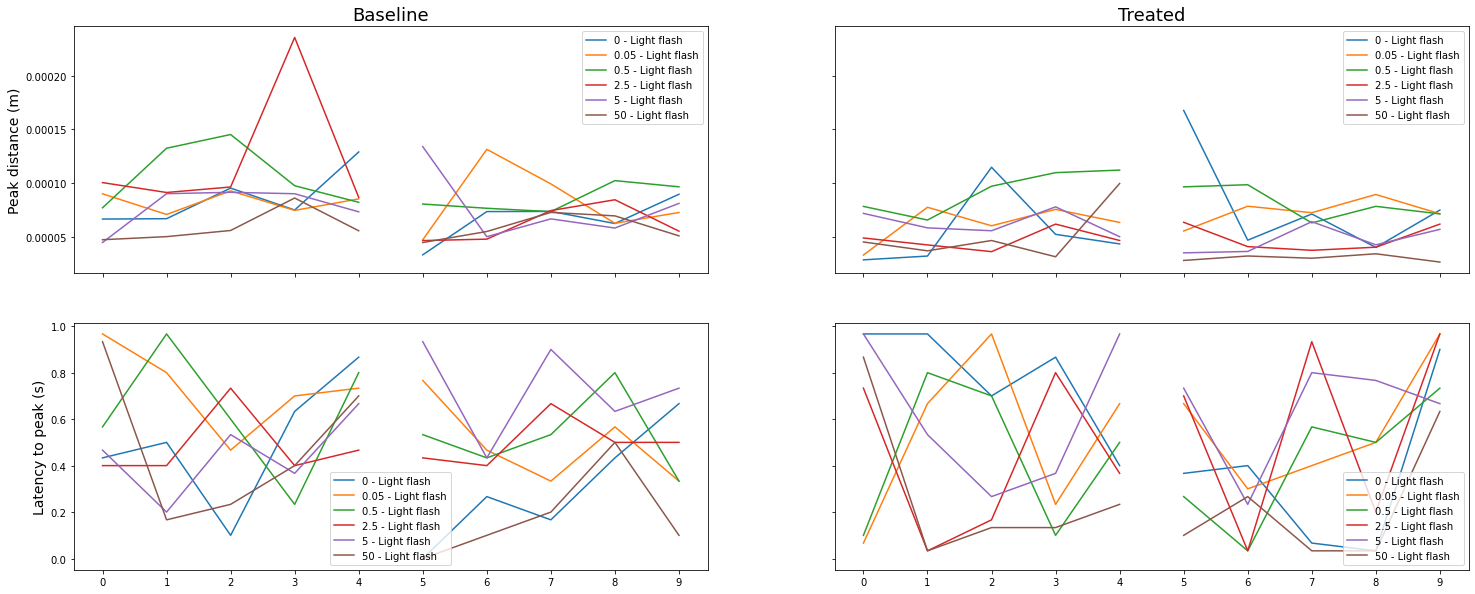

In [119]:
fig, axs = plt.subplots(2, 2, figsize=(25, 10), sharey='row', sharex=True)

for conc, df in dfs['baseline_dfs'].items():
    stim_nums = df[df.stim_name == 'light_flash'].stim_num.unique()

    x = []
    peaks = []
    latencies = []

    for num in stim_nums:
        if num == 5:
            peaks.append(np.nan)
            latencies.append(np.nan)
            x.append(np.nan)

        trial = df[(df.stim_name == 'light_flash') & (df.stim_num == num)]
        peak_dist = trial.average_dist.max()
        peak_index = trial.average_dist.idxmax()
        latency = trial.loc[peak_index, 'time'] - trial.iloc[0, 0]

        peaks.append(peak_dist)
        latencies.append(latency)
        x.append(num)

    axs[0, 0].plot(x, peaks, label=f'{conc} - Light flash')
    axs[0, 0].set_xticks(np.arange(min(x), max(x)+1, 1))
    axs[0, 0].legend()

    axs[1, 0].plot(x, latencies, label=f'{conc} - Light flash')
    axs[1, 0].set_xticks(np.arange(min(x), max(x)+1, 1))
    axs[1, 0].legend()

for conc, df in dfs['drugtreated_dfs'].items():
    stim_nums = df[df.stim_name == 'light_flash'].stim_num.unique()

    x = []
    peaks = []
    latencies = []

    for num in stim_nums:
        if num == 5:
            peaks.append(np.nan)
            latencies.append(np.nan)
            x.append(np.nan)

        trial = df[(df.stim_name == 'light_flash') & (df.stim_num == num)]
        peak_dist = trial.average_dist.max()
        peak_index = trial.average_dist.idxmax()
        latency = trial.loc[peak_index, 'time'] - trial.iloc[0, 0]

        peaks.append(peak_dist)
        latencies.append(latency)
        x.append(num)

    axs[0, 1].plot(x, peaks, label=f'{conc} - Light flash')
    axs[0, 1].set_xticks(np.arange(min(x), max(x)+1, 1))
    axs[0, 1].legend()

    axs[1, 1].plot(x, latencies, label=f'{conc} - Light flash')
    axs[1, 1].set_xticks(np.arange(min(x), max(x)+1, 1))
    axs[1, 1].legend()

axs[0, 0].set_title('Baseline', fontsize=18)
axs[0, 1].set_title('Treated', fontsize=18)
axs[0, 0].set_ylabel('Peak distance (m)', fontsize=14)
axs[1, 0].set_ylabel('Latency to peak (s)', fontsize=14)

plt.savefig(os.path.join(data_folder, f'lightflash_adaptation_bd.pdf'))

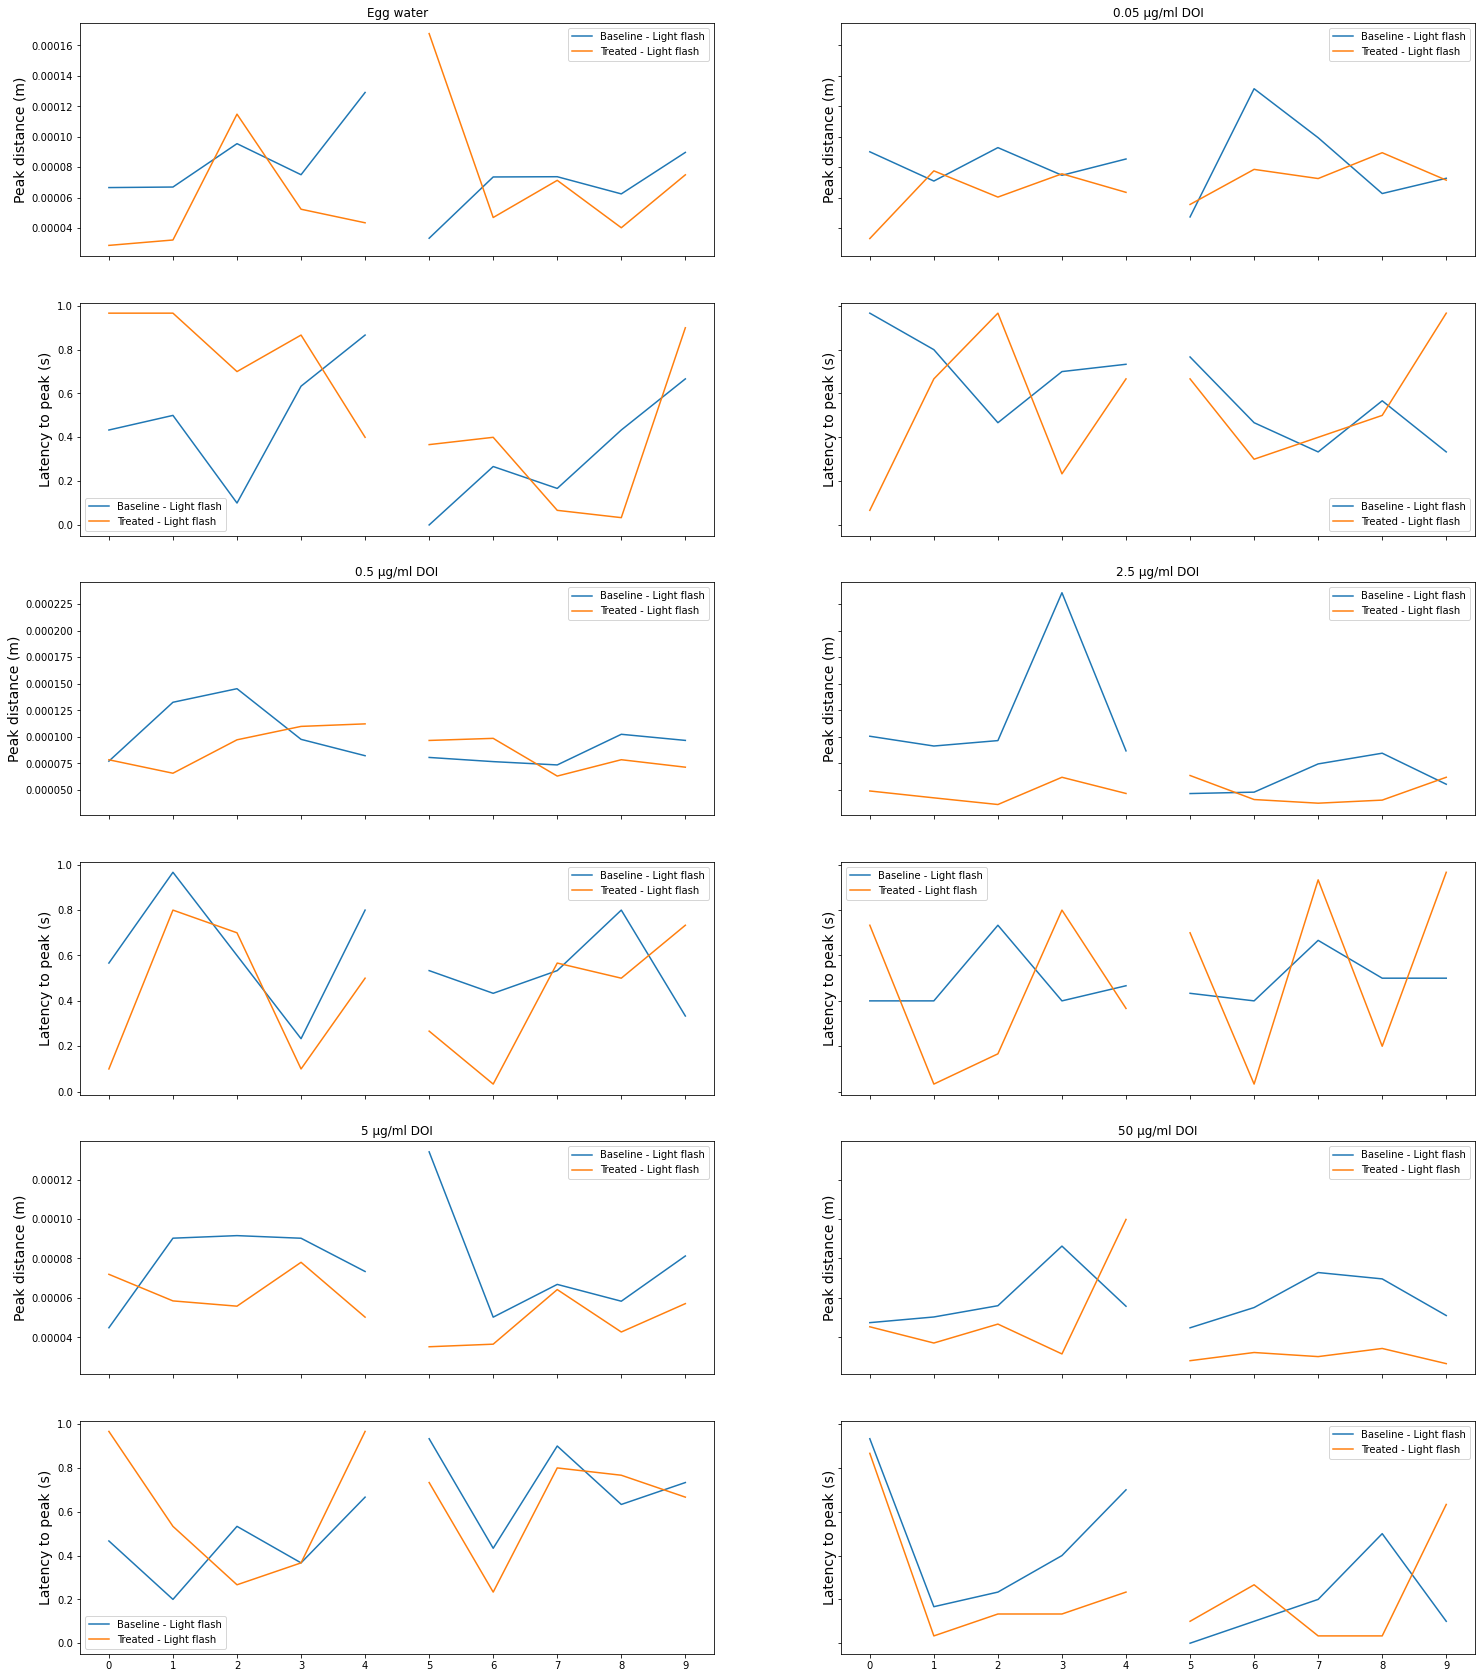

In [120]:
fig, axs = plt.subplots(6, 2, figsize=(25, 30), sharey='row', sharex=True)

for conc, df in dfs['baseline_dfs'].items():
    stim_nums = df[df.stim_name == 'light_flash'].stim_num.unique()

    x = []
    peaks = []
    latencies = []

    for num in stim_nums:
        if num == 5:
            peaks.append(np.nan)
            latencies.append(np.nan)
            x.append(np.nan)

        trial = df[(df.stim_name == 'light_flash') & (df.stim_num == num)]
        peak_dist = trial.average_dist.max()
        peak_index = trial.average_dist.idxmax()
        latency = trial.loc[peak_index, 'time'] - trial.iloc[0, 0]

        peaks.append(peak_dist)
        latencies.append(latency)
        x.append(num)

    if conc == 0:
        axs[0, 0].plot(x, peaks, label=f'Baseline - Light flash')
        axs[0, 0].set_xticks(np.arange(min(x), max(x)+1, 1))
        axs[0, 0].legend()
        axs[0, 0].set_title('Egg water')
        axs[0, 0].set_ylabel('Peak distance (m)', fontsize=14)

        axs[1, 0].plot(x, latencies, label=f'Baseline - Light flash')
        axs[1, 0].set_xticks(np.arange(min(x), max(x)+1, 1))
        axs[1, 0].legend()
        axs[1, 0].set_ylabel('Latency to peak (s)', fontsize=14)
    elif conc == 0.05:
        axs[0, 1].plot(x, peaks, label=f'Baseline - Light flash')
        axs[0, 1].set_xticks(np.arange(min(x), max(x)+1, 1))
        axs[0, 1].legend()
        axs[0, 1].set_title('0.05 µg/ml DOI')
        axs[0, 1].set_ylabel('Peak distance (m)', fontsize=14)

        axs[1, 1].plot(x, latencies, label=f'Baseline - Light flash')
        axs[1, 1].set_xticks(np.arange(min(x), max(x)+1, 1))
        axs[1, 1].legend()
        axs[1, 1].set_ylabel('Latency to peak (s)', fontsize=14)
    elif conc == 0.5:
        axs[2, 0].plot(x, peaks, label=f'Baseline - Light flash')
        axs[2, 0].set_xticks(np.arange(min(x), max(x)+1, 1))
        axs[2, 0].legend()
        axs[2, 0].set_title('0.5 µg/ml DOI')
        axs[2, 0].set_ylabel('Peak distance (m)', fontsize=14)

        axs[3, 0].plot(x, latencies, label=f'Baseline - Light flash')
        axs[3, 0].set_xticks(np.arange(min(x), max(x)+1, 1))
        axs[3, 0].legend()
        axs[3, 0].set_ylabel('Latency to peak (s)', fontsize=14)
    elif conc == 2.5:
        axs[2, 1].plot(x, peaks, label=f'Baseline - Light flash')
        axs[2, 1].set_xticks(np.arange(min(x), max(x)+1, 1))
        axs[2, 1].legend()
        axs[2, 1].set_title('2.5 µg/ml DOI')
        axs[2, 1].set_ylabel('Peak distance (m)', fontsize=14)

        axs[3, 1].plot(x, latencies, label=f'Baseline - Light flash')
        axs[3, 1].set_xticks(np.arange(min(x), max(x)+1, 1))
        axs[3, 1].legend()
        axs[3, 1].set_ylabel('Latency to peak (s)', fontsize=14)
    elif conc == 5:
        axs[4, 0].plot(x, peaks, label=f'Baseline - Light flash')
        axs[4, 0].set_xticks(np.arange(min(x), max(x)+1, 1))
        axs[4, 0].legend()
        axs[4, 0].set_title('5 µg/ml DOI')
        axs[4, 0].set_ylabel('Peak distance (m)', fontsize=14)

        axs[5, 0].plot(x, latencies, label=f'Baseline - Light flash')
        axs[5, 0].set_xticks(np.arange(min(x), max(x)+1, 1))
        axs[5, 0].legend()
        axs[5, 0].set_ylabel('Latency to peak (s)', fontsize=14)
    elif conc == 50:
        axs[4, 1].plot(x, peaks, label=f'Baseline - Light flash')
        axs[4, 1].set_xticks(np.arange(min(x), max(x)+1, 1))
        axs[4, 1].legend()
        axs[4, 1].set_title('50 µg/ml DOI')
        axs[4, 1].set_ylabel('Peak distance (m)', fontsize=14)

        axs[5, 1].plot(x, latencies, label=f'Baseline - Light flash')
        axs[5, 1].set_xticks(np.arange(min(x), max(x)+1, 1))
        axs[5, 1].legend()
        axs[5, 1].set_ylabel('Latency to peak (s)', fontsize=14)

for conc, df in dfs['drugtreated_dfs'].items():
    stim_nums = df[df.stim_name == 'light_flash'].stim_num.unique()

    x = []
    peaks = []
    latencies = []

    for num in stim_nums:
        if num == 5:
            peaks.append(np.nan)
            latencies.append(np.nan)
            x.append(np.nan)

        trial = df[(df.stim_name == 'light_flash') & (df.stim_num == num)]
        peak_dist = trial.average_dist.max()
        peak_index = trial.average_dist.idxmax()
        latency = trial.loc[peak_index, 'time'] - trial.iloc[0, 0]

        peaks.append(peak_dist)
        latencies.append(latency)
        x.append(num)

    if conc == 0:
        axs[0, 0].plot(x, peaks, label=f'Treated - Light flash')
        axs[0, 0].set_xticks(np.arange(min(x), max(x)+1, 1))
        axs[0, 0].legend()
        axs[0, 0].set_title('Egg water')
        axs[0, 0].set_ylabel('Peak distance (m)', fontsize=14)

        axs[1, 0].plot(x, latencies, label=f'Treated - Light flash')
        axs[1, 0].set_xticks(np.arange(min(x), max(x)+1, 1))
        axs[1, 0].legend()
        axs[1, 0].set_ylabel('Latency to peak (s)', fontsize=14)
    elif conc == 0.05:
        axs[0, 1].plot(x, peaks, label=f'Treated - Light flash')
        axs[0, 1].set_xticks(np.arange(min(x), max(x)+1, 1))
        axs[0, 1].legend()
        axs[0, 1].set_title('0.05 µg/ml DOI')
        axs[0, 1].set_ylabel('Peak distance (m)', fontsize=14)

        axs[1, 1].plot(x, latencies, label=f'Treated - Light flash')
        axs[1, 1].set_xticks(np.arange(min(x), max(x)+1, 1))
        axs[1, 1].legend()
        axs[1, 1].set_ylabel('Latency to peak (s)', fontsize=14)
    elif conc == 0.5:
        axs[2, 0].plot(x, peaks, label=f'Treated - Light flash')
        axs[2, 0].set_xticks(np.arange(min(x), max(x)+1, 1))
        axs[2, 0].legend()
        axs[2, 0].set_title('0.5 µg/ml DOI')
        axs[2, 0].set_ylabel('Peak distance (m)', fontsize=14)

        axs[3, 0].plot(x, latencies, label=f'Treated - Light flash')
        axs[3, 0].set_xticks(np.arange(min(x), max(x)+1, 1))
        axs[3, 0].legend()
        axs[3, 0].set_ylabel('Latency to peak (s)', fontsize=14)
    elif conc == 2.5:
        axs[2, 1].plot(x, peaks, label=f'Treated - Light flash')
        axs[2, 1].set_xticks(np.arange(min(x), max(x)+1, 1))
        axs[2, 1].legend()
        axs[2, 1].set_title('2.5 µg/ml DOI')
        axs[2, 1].set_ylabel('Peak distance (m)', fontsize=14)

        axs[3, 1].plot(x, latencies, label=f'Treated - Light flash')
        axs[3, 1].set_xticks(np.arange(min(x), max(x)+1, 1))
        axs[3, 1].legend()
        axs[3, 1].set_ylabel('Latency to peak (s)', fontsize=14)
    elif conc == 5:
        axs[4, 0].plot(x, peaks, label=f'Treated - Light flash')
        axs[4, 0].set_xticks(np.arange(min(x), max(x)+1, 1))
        axs[4, 0].legend()
        axs[4, 0].set_title('5 µg/ml DOI')
        axs[4, 0].set_ylabel('Peak distance (m)', fontsize=14)

        axs[5, 0].plot(x, latencies, label=f'Treated - Light flash')
        axs[5, 0].set_xticks(np.arange(min(x), max(x)+1, 1))
        axs[5, 0].legend()
        axs[5, 0].set_ylabel('Latency to peak (s)', fontsize=14)
    elif conc == 50:
        axs[4, 1].plot(x, peaks, label=f'Treated - Light flash')
        axs[4, 1].set_xticks(np.arange(min(x), max(x)+1, 1))
        axs[4, 1].legend()
        axs[4, 1].set_title('50 µg/ml DOI')
        axs[4, 1].set_ylabel('Peak distance (m)', fontsize=14)

        axs[5, 1].plot(x, latencies, label=f'Treated - Light flash')
        axs[5, 1].set_xticks(np.arange(min(x), max(x)+1, 1))
        axs[5, 1].legend()
        axs[5, 1].set_ylabel('Latency to peak (s)', fontsize=14)

plt.savefig(os.path.join(data_folder, f'lightflash_adaptation_ed.pdf'))

### Vibration startle

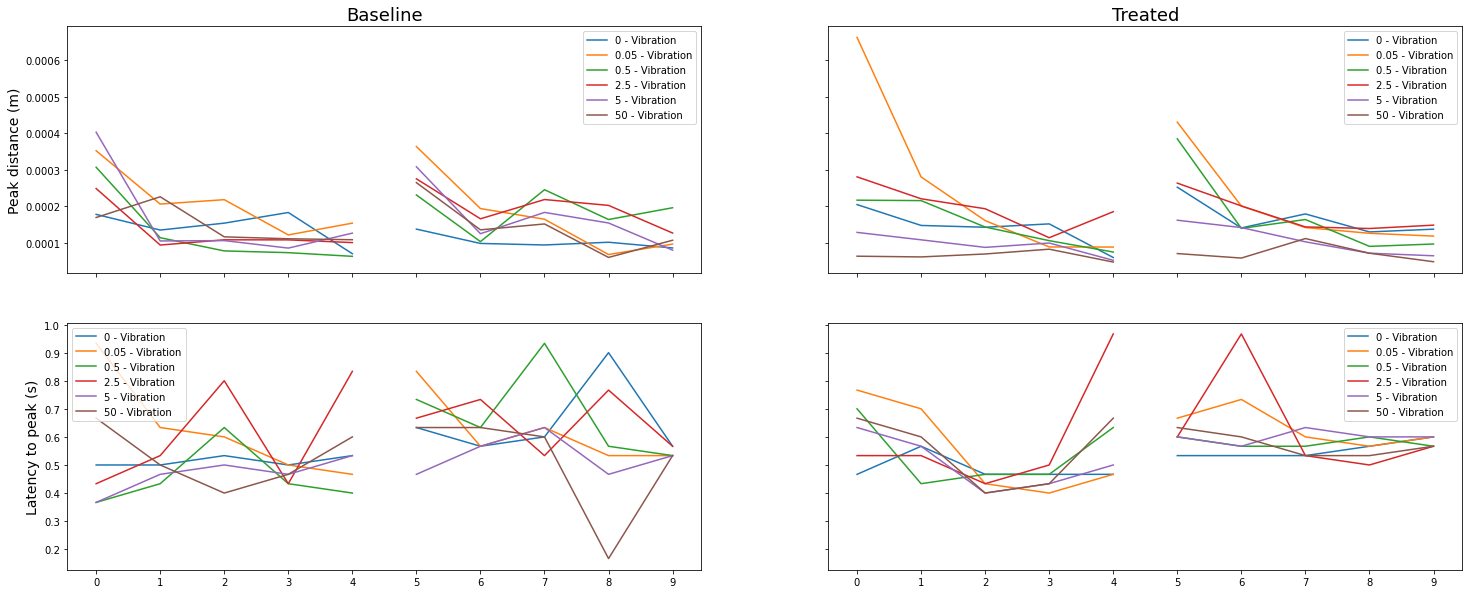

In [121]:
fig, axs = plt.subplots(2, 2, figsize=(25, 10), sharey='row', sharex=True)

for conc, df in dfs['baseline_dfs'].items():
    stim_nums = df[df.stim_name == 'vibration_startle'].stim_num.unique()

    x = []
    peaks = []
    latencies = []

    for num in stim_nums:
        if num == 5:
            peaks.append(np.nan)
            latencies.append(np.nan)
            x.append(np.nan)

        trial = df[(df.stim_name == 'vibration_startle') & (df.stim_num == num)]
        peak_dist = trial.average_dist.max()
        peak_index = trial.average_dist.idxmax()
        latency = trial.loc[peak_index, 'time'] - trial.iloc[0, 0]

        peaks.append(peak_dist)
        latencies.append(latency)
        x.append(num)

    axs[0, 0].plot(x, peaks, label=f'{conc} - Vibration')
    axs[0, 0].set_xticks(np.arange(min(x), max(x)+1, 1))
    axs[0, 0].legend()

    axs[1, 0].plot(x, latencies, label=f'{conc} - Vibration')
    axs[1, 0].set_xticks(np.arange(min(x), max(x)+1, 1))
    axs[1, 0].legend()

for conc, df in dfs['drugtreated_dfs'].items():
    stim_nums = df[df.stim_name == 'vibration_startle'].stim_num.unique()

    x = []
    peaks = []
    latencies = []

    for num in stim_nums:
        if num == 5:
            peaks.append(np.nan)
            latencies.append(np.nan)
            x.append(np.nan)

        trial = df[(df.stim_name == 'vibration_startle') & (df.stim_num == num)]
        peak_dist = trial.average_dist.max()
        peak_index = trial.average_dist.idxmax()
        latency = trial.loc[peak_index, 'time'] - trial.iloc[0, 0]

        peaks.append(peak_dist)
        latencies.append(latency)
        x.append(num)

    axs[0, 1].plot(x, peaks, label=f'{conc} - Vibration')
    axs[0, 1].set_xticks(np.arange(min(x), max(x)+1, 1))
    axs[0, 1].legend()

    axs[1, 1].plot(x, latencies, label=f'{conc} - Vibration')
    axs[1, 1].set_xticks(np.arange(min(x), max(x)+1, 1))
    axs[1, 1].legend()

axs[0, 0].set_title('Baseline', fontsize=18)
axs[0, 1].set_title('Treated', fontsize=18)
axs[0, 0].set_ylabel('Peak distance (m)', fontsize=14)
axs[1, 0].set_ylabel('Latency to peak (s)', fontsize=14)

plt.savefig(os.path.join(data_folder, f'vibration_adaptation_bd.pdf'))

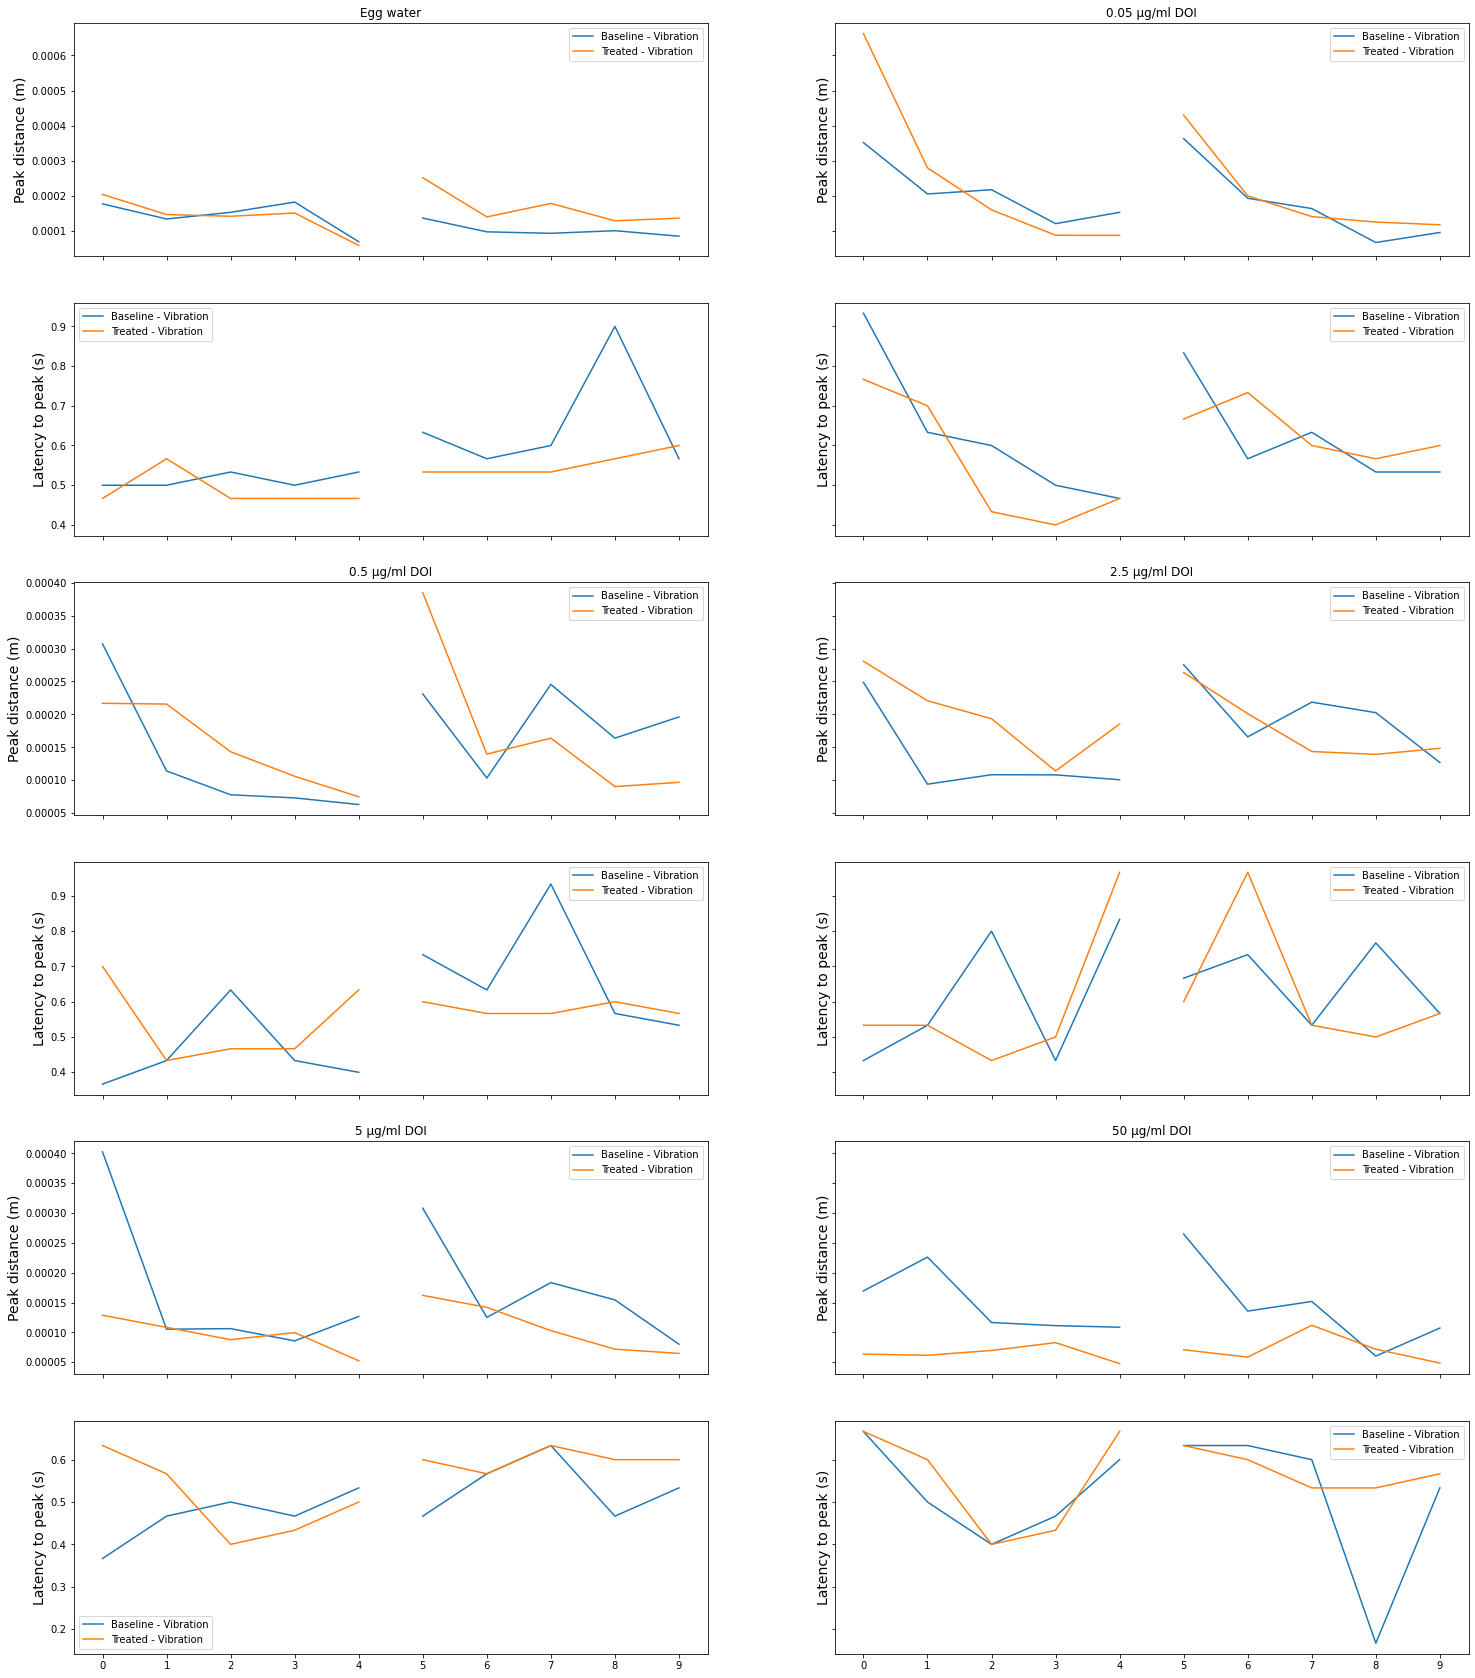

In [122]:
fig, axs = plt.subplots(6, 2, figsize=(25, 30), sharey='row', sharex=True)

for conc, df in dfs['baseline_dfs'].items():
    stim_nums = df[df.stim_name == 'vibration_startle'].stim_num.unique()

    x = []
    peaks = []
    latencies = []

    for num in stim_nums:
        if num == 5:
            peaks.append(np.nan)
            latencies.append(np.nan)
            x.append(np.nan)

        trial = df[(df.stim_name == 'vibration_startle') & (df.stim_num == num)]
        peak_dist = trial.average_dist.max()
        peak_index = trial.average_dist.idxmax()
        latency = trial.loc[peak_index, 'time'] - trial.iloc[0, 0]

        peaks.append(peak_dist)
        latencies.append(latency)
        x.append(num)

    if conc == 0:
        axs[0, 0].plot(x, peaks, label=f'Baseline - Vibration')
        axs[0, 0].set_xticks(np.arange(min(x), max(x)+1, 1))
        axs[0, 0].legend()
        axs[0, 0].set_title('Egg water')
        axs[0, 0].set_ylabel('Peak distance (m)', fontsize=14)

        axs[1, 0].plot(x, latencies, label=f'Baseline - Vibration')
        axs[1, 0].set_xticks(np.arange(min(x), max(x)+1, 1))
        axs[1, 0].legend()
        axs[1, 0].set_ylabel('Latency to peak (s)', fontsize=14)
    elif conc == 0.05:
        axs[0, 1].plot(x, peaks, label=f'Baseline - Vibration')
        axs[0, 1].set_xticks(np.arange(min(x), max(x)+1, 1))
        axs[0, 1].legend()
        axs[0, 1].set_title('0.05 µg/ml DOI')
        axs[0, 1].set_ylabel('Peak distance (m)', fontsize=14)

        axs[1, 1].plot(x, latencies, label=f'Baseline - Vibration')
        axs[1, 1].set_xticks(np.arange(min(x), max(x)+1, 1))
        axs[1, 1].legend()
        axs[1, 1].set_ylabel('Latency to peak (s)', fontsize=14)
    elif conc == 0.5:
        axs[2, 0].plot(x, peaks, label=f'Baseline - Vibration')
        axs[2, 0].set_xticks(np.arange(min(x), max(x)+1, 1))
        axs[2, 0].legend()
        axs[2, 0].set_title('0.5 µg/ml DOI')
        axs[2, 0].set_ylabel('Peak distance (m)', fontsize=14)

        axs[3, 0].plot(x, latencies, label=f'Baseline - Vibration')
        axs[3, 0].set_xticks(np.arange(min(x), max(x)+1, 1))
        axs[3, 0].legend()
        axs[3, 0].set_ylabel('Latency to peak (s)', fontsize=14)
    elif conc == 2.5:
        axs[2, 1].plot(x, peaks, label=f'Baseline - Vibration')
        axs[2, 1].set_xticks(np.arange(min(x), max(x)+1, 1))
        axs[2, 1].legend()
        axs[2, 1].set_title('2.5 µg/ml DOI')
        axs[2, 1].set_ylabel('Peak distance (m)', fontsize=14)

        axs[3, 1].plot(x, latencies, label=f'Baseline - Vibration')
        axs[3, 1].set_xticks(np.arange(min(x), max(x)+1, 1))
        axs[3, 1].legend()
        axs[3, 1].set_ylabel('Latency to peak (s)', fontsize=14)
    elif conc == 5:
        axs[4, 0].plot(x, peaks, label=f'Baseline - Vibration')
        axs[4, 0].set_xticks(np.arange(min(x), max(x)+1, 1))
        axs[4, 0].legend()
        axs[4, 0].set_title('5 µg/ml DOI')
        axs[4, 0].set_ylabel('Peak distance (m)', fontsize=14)

        axs[5, 0].plot(x, latencies, label=f'Baseline - Vibration')
        axs[5, 0].set_xticks(np.arange(min(x), max(x)+1, 1))
        axs[5, 0].legend()
        axs[5, 0].set_ylabel('Latency to peak (s)', fontsize=14)
    elif conc == 50:
        axs[4, 1].plot(x, peaks, label=f'Baseline - Vibration')
        axs[4, 1].set_xticks(np.arange(min(x), max(x)+1, 1))
        axs[4, 1].legend()
        axs[4, 1].set_title('50 µg/ml DOI')
        axs[4, 1].set_ylabel('Peak distance (m)', fontsize=14)

        axs[5, 1].plot(x, latencies, label=f'Baseline - Vibration')
        axs[5, 1].set_xticks(np.arange(min(x), max(x)+1, 1))
        axs[5, 1].legend()
        axs[5, 1].set_ylabel('Latency to peak (s)', fontsize=14)

for conc, df in dfs['drugtreated_dfs'].items():
    stim_nums = df[df.stim_name == 'vibration_startle'].stim_num.unique()

    x = []
    peaks = []
    latencies = []

    for num in stim_nums:
        if num == 5:
            peaks.append(np.nan)
            latencies.append(np.nan)
            x.append(np.nan)

        trial = df[(df.stim_name == 'vibration_startle') & (df.stim_num == num)]
        peak_dist = trial.average_dist.max()
        peak_index = trial.average_dist.idxmax()
        latency = trial.loc[peak_index, 'time'] - trial.iloc[0, 0]

        peaks.append(peak_dist)
        latencies.append(latency)
        x.append(num)

    if conc == 0:
        axs[0, 0].plot(x, peaks, label=f'Treated - Vibration')
        axs[0, 0].set_xticks(np.arange(min(x), max(x)+1, 1))
        axs[0, 0].legend()
        axs[0, 0].set_title('Egg water')
        axs[0, 0].set_ylabel('Peak distance (m)', fontsize=14)

        axs[1, 0].plot(x, latencies, label=f'Treated - Vibration')
        axs[1, 0].set_xticks(np.arange(min(x), max(x)+1, 1))
        axs[1, 0].legend()
        axs[1, 0].set_ylabel('Latency to peak (s)', fontsize=14)
    elif conc == 0.05:
        axs[0, 1].plot(x, peaks, label=f'Treated - Vibration')
        axs[0, 1].set_xticks(np.arange(min(x), max(x)+1, 1))
        axs[0, 1].legend()
        axs[0, 1].set_title('0.05 µg/ml DOI')
        axs[0, 1].set_ylabel('Peak distance (m)', fontsize=14)

        axs[1, 1].plot(x, latencies, label=f'Treated - Vibration')
        axs[1, 1].set_xticks(np.arange(min(x), max(x)+1, 1))
        axs[1, 1].legend()
        axs[1, 1].set_ylabel('Latency to peak (s)', fontsize=14)
    elif conc == 0.5:
        axs[2, 0].plot(x, peaks, label=f'Treated - Vibration')
        axs[2, 0].set_xticks(np.arange(min(x), max(x)+1, 1))
        axs[2, 0].legend()
        axs[2, 0].set_title('0.5 µg/ml DOI')
        axs[2, 0].set_ylabel('Peak distance (m)', fontsize=14)

        axs[3, 0].plot(x, latencies, label=f'Treated - Vibration')
        axs[3, 0].set_xticks(np.arange(min(x), max(x)+1, 1))
        axs[3, 0].legend()
        axs[3, 0].set_ylabel('Latency to peak (s)', fontsize=14)
    elif conc == 2.5:
        axs[2, 1].plot(x, peaks, label=f'Treated - Vibration')
        axs[2, 1].set_xticks(np.arange(min(x), max(x)+1, 1))
        axs[2, 1].legend()
        axs[2, 1].set_title('2.5 µg/ml DOI')
        axs[2, 1].set_ylabel('Peak distance (m)', fontsize=14)

        axs[3, 1].plot(x, latencies, label=f'Treated - Vibration')
        axs[3, 1].set_xticks(np.arange(min(x), max(x)+1, 1))
        axs[3, 1].legend()
        axs[3, 1].set_ylabel('Latency to peak (s)', fontsize=14)
    elif conc == 5:
        axs[4, 0].plot(x, peaks, label=f'Treated - Vibration')
        axs[4, 0].set_xticks(np.arange(min(x), max(x)+1, 1))
        axs[4, 0].legend()
        axs[4, 0].set_title('5 µg/ml DOI')
        axs[4, 0].set_ylabel('Peak distance (m)', fontsize=14)

        axs[5, 0].plot(x, latencies, label=f'Treated - Vibration')
        axs[5, 0].set_xticks(np.arange(min(x), max(x)+1, 1))
        axs[5, 0].legend()
        axs[5, 0].set_ylabel('Latency to peak (s)', fontsize=14)
    elif conc == 50:
        axs[4, 1].plot(x, peaks, label=f'Treated - Vibration')
        axs[4, 1].set_xticks(np.arange(min(x), max(x)+1, 1))
        axs[4, 1].legend()
        axs[4, 1].set_title('50 µg/ml DOI')
        axs[4, 1].set_ylabel('Peak distance (m)', fontsize=14)

        axs[5, 1].plot(x, latencies, label=f'Treated - Vibration')
        axs[5, 1].set_xticks(np.arange(min(x), max(x)+1, 1))
        axs[5, 1].legend()
        axs[5, 1].set_ylabel('Latency to peak (s)', fontsize=14)

plt.savefig(os.path.join(data_folder, f'vibration_adaptation_ed.pdf'))

## Thigmotaxis

In [123]:
data_folder = r'/Volumes/Seagate Basic/20230705_NaumannLab_DOI_Experiments'

In [126]:
b_thigmo_dfs = []  # list of baseline dataframes
d_thigmo_dfs = []  # list of drugtreated dataframes
r_thigmo_dfs = []  # list of 24 hour recovery dataframes

cols = ['snout', 'snout', 'snout', 'L_eye', 'L_eye', 'L_eye', 'R_eye', 'R_eye', 'R_eye',
        'center_y', 'center_x', 'center_likelihood', 'caudal_fin', 'caudal_fin', 'caudal_fin', 'mid_tail',
        'mid_tail', 'mid_tail', 'between_center_and_mid', 'between_center_and_mid',
        'between_center_and_mid', 'between_mid_and_caudal', 'between_mid_and_caudal',
        'between_mid_and_caudal'] * 24
cols = ['time'] + cols

with os.scandir(data_folder) as entries:
    for entry in entries:
        if os.path.isdir(entry.path) and entry.name.startswith('EK'):

            with os.scandir(entry.path) as subentries:
                for subentry in subentries:
                    if subentry.name.startswith('baseline'):
                        b_csv_path = os.path.join(subentry.path, 'results', 'tracking_data.csv')
                        b_df = pd.read_csv(b_csv_path, header=10).set_axis(cols, axis='columns')
                        b_thigmo_dfs.append(b_df)

                    elif subentry.name.startswith('drugtreated'):
                        d_csv_path = os.path.join(subentry.path, 'results', 'tracking_data.csv')
                        d_df = pd.read_csv(d_csv_path, header=10).set_axis(cols, axis='columns')
                        d_thigmo_dfs.append(d_df)

                    elif subentry.name.startswith('24hour_recovery'):
                        r_csv_path = os.path.join(subentry.path, 'results', 'tracking_data.csv')
                        r_df = pd.read_csv(r_csv_path, header=10).set_axis(cols, axis='columns')
                        r_thigmo_dfs.append(r_df)

In [137]:
# Split the concentrations for baseline

baseline_thigmo_dfs = {0: [], 0.05: [], 0.5: [], 2.5:[], 5: [], 50:[]}

for i, df in enumerate(b_thigmo_dfs):
    thigmo_df = df[['time', 'center_y', 'center_x']]
    if i == 0:
        # First dataframe will also include the time column
        baseline_thigmo_dfs[0].append(thigmo_df.iloc[:, np.r_[0, 1:25:6, 25:49:6]])
        baseline_thigmo_dfs[0.05].append(thigmo_df.iloc[:, np.r_[0, 2:25:6, 26:49:6]])
        baseline_thigmo_dfs[0.5].append(thigmo_df.iloc[:, np.r_[0, 3:25:6, 27:49:6]])
        baseline_thigmo_dfs[2.5].append(thigmo_df.iloc[:, np.r_[0, 4:25:6, 28:49:6]])
        baseline_thigmo_dfs[5].append(thigmo_df.iloc[:, np.r_[0, 5:25:6, 29:49:6]])
        baseline_thigmo_dfs[50].append(thigmo_df.iloc[:, np.r_[0, 6:25:6, 30:49:6]])

    else:
        baseline_thigmo_dfs[0].append(thigmo_df.iloc[:, np.r_[1:25:6, 25:49:6]])
        baseline_thigmo_dfs[0.05].append(thigmo_df.iloc[:, np.r_[2:25:6, 26:49:6]])
        baseline_thigmo_dfs[0.5].append(thigmo_df.iloc[:, np.r_[3:25:6, 27:49:6]])
        baseline_thigmo_dfs[2.5].append(thigmo_df.iloc[:, np.r_[4:25:6, 28:49:6]])
        baseline_thigmo_dfs[5].append(thigmo_df.iloc[:, np.r_[5:25:6, 29:49:6]])
        baseline_thigmo_dfs[50].append(thigmo_df.iloc[:, np.r_[6:25:6, 30:49:6]])

In [138]:
# Split the concentrations for drugtreated

drugtreated_thigmo_dfs = {0: [], 0.05: [], 0.5: [], 2.5:[], 5: [], 50:[]}

for i, df in enumerate(d_thigmo_dfs):
    thigmo_df = df[['time', 'center_y', 'center_x']]
    if i == 0:
        # First dataframe will also include the time column
        drugtreated_thigmo_dfs[0].append(thigmo_df.iloc[:, np.r_[0, 1:25:6, 25:49:6]])
        drugtreated_thigmo_dfs[0.05].append(thigmo_df.iloc[:, np.r_[0, 2:25:6, 26:49:6]])
        drugtreated_thigmo_dfs[0.5].append(thigmo_df.iloc[:, np.r_[0, 3:25:6, 27:49:6]])
        drugtreated_thigmo_dfs[2.5].append(thigmo_df.iloc[:, np.r_[0, 4:25:6, 28:49:6]])
        drugtreated_thigmo_dfs[5].append(thigmo_df.iloc[:, np.r_[0, 5:25:6, 29:49:6]])
        drugtreated_thigmo_dfs[50].append(thigmo_df.iloc[:, np.r_[0, 6:25:6, 30:49:6]])

    else:
        drugtreated_thigmo_dfs[0].append(thigmo_df.iloc[:, np.r_[1:25:6, 25:49:6]])
        drugtreated_thigmo_dfs[0.05].append(thigmo_df.iloc[:, np.r_[2:25:6, 26:49:6]])
        drugtreated_thigmo_dfs[0.5].append(thigmo_df.iloc[:, np.r_[3:25:6, 27:49:6]])
        drugtreated_thigmo_dfs[2.5].append(thigmo_df.iloc[:, np.r_[4:25:6, 28:49:6]])
        drugtreated_thigmo_dfs[5].append(thigmo_df.iloc[:, np.r_[5:25:6, 29:49:6]])
        drugtreated_thigmo_dfs[50].append(thigmo_df.iloc[:, np.r_[6:25:6, 30:49:6]])

In [139]:
# Concatenate dataframes from different experiment sessions into one

for key in baseline_thigmo_dfs:
    baseline_thigmo_dfs[key] = pd.concat(baseline_thigmo_dfs[key], axis=1)

for key in drugtreated_thigmo_dfs:
    drugtreated_thigmo_dfs[key] = pd.concat(drugtreated_thigmo_dfs[key], axis=1)
    drugtreated_thigmo_dfs[key].drop(drugtreated_thigmo_dfs[key].tail(1).index, inplace=True)

In [141]:
# Add stimuli to main dataframes and save as csv

stim_df = pd.read_csv(os.path.join(stim_folder, 'stim_df.csv'), index_col=0)

for i, key in enumerate(baseline_thigmo_dfs):
    df = pd.concat([baseline_thigmo_dfs[key], stim_df], axis=1)
    df.to_csv(os.path.join(stim_folder, f'{str(key)}_baseline_thigmotaxis.csv'))

for i, key in enumerate(drugtreated_thigmo_dfs):
    df = pd.concat([drugtreated_thigmo_dfs[key], stim_df], axis=1)
    df.to_csv(os.path.join(stim_folder, f'{str(key)}_drugtreated_thigmotaxis.csv'))

### Load the dataframes

In [147]:
data_folder = r'/Users/minelarinel/Documents/Duke University/Naumann Lab/DOI/Behavior/MCAM/SecondExperiments_doseresponse_10minincubation'

In [151]:
thigmo_dfs = {'baseline_dfs': {0: [], 0.05: [], 0.5: [], 2.5: [], 5: [], 50: []},
       'drugtreated_dfs': {0: [], 0.05: [], 0.5: [], 2.5: [], 5: [], 50: []}}

with os.scandir(data_folder) as entries:
    for entry in entries:
        if entry.name.endswith('.csv'):
            if 'baseline_thigmotaxis' in entry.name:
                concentration = float(entry.name[:entry.name.find('_')])
                thigmo_dfs['baseline_dfs'][concentration] = pd.read_csv(entry.path, index_col=0)
            elif 'drugtreated_thigmotaxis' in entry.name:
                concentration = float(entry.name[:entry.name.find('_')])
                thigmo_dfs['drugtreated_dfs'][concentration] = pd.read_csv(entry.path, index_col=0)

### Calculate distance from center

In [152]:
for key in thigmo_dfs:
    for df in thigmo_dfs[key].values():
        df[['dist_from_center']+[f'dist_from_center.{i}' for i in range(1, 20)]] = 0

        for i, row in df.iterrows():
            for j in range(20):
                if j == 0:
                    df.loc[i, 'dist_from_center'] = np.linalg.norm((row['center_x'], row['center_y']))

                else:
                    df.loc[i, f'dist_from_center.{j}'] = np.linalg.norm((row[f'center_x.{j}'], row[f'center_y.{j}']))

In [153]:
# Add an 'average_dist_from_center' column that has the average distance from center across fish

cols = [col for col in thigmo_dfs['baseline_dfs'][0] if col.startswith('dist_from_center')]

for key in thigmo_dfs:
    for conc, df in thigmo_dfs[key].items():
        df['average_dist_from_center'] = df[cols].mean(axis=1)
        df.to_csv(os.path.join(data_folder, f'{conc}_thigmotaxis.csv'))

### Whole experiment thigmotaxis

In [158]:
# Adds a binned_time column which is the time that each row belongs to

time_bin = 1.0 # in seconds

for key in thigmo_dfs:
    for conc, df in thigmo_dfs[key].items():
        df['binned_time'] = 0

        for i, row in df.iterrows():
            if df.loc[i, 'time'] < time_bin:
                df.loc[i, 'binned_time'] = time_bin
            else:
                time_bin += 1
                df.loc[i, 'binned_time'] = time_bin

        time_bin = 1.0

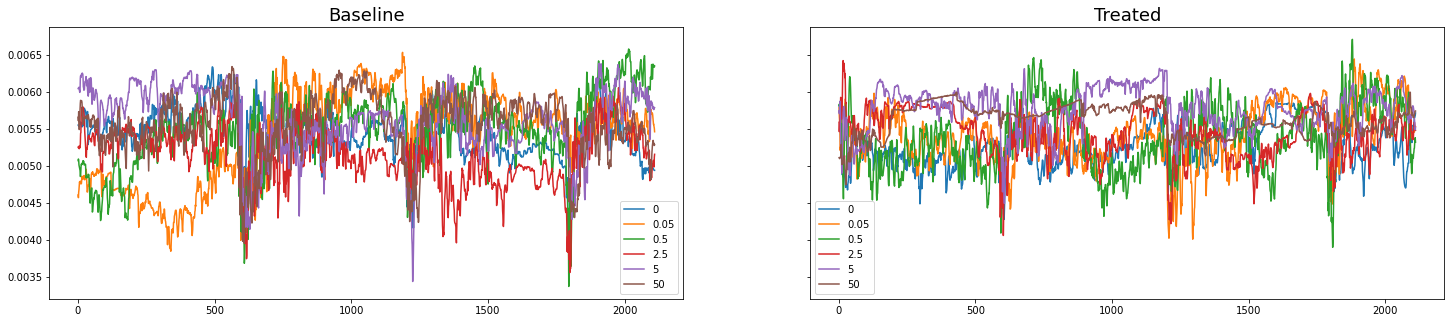

In [160]:
fig, axs = plt.subplots(1, 2, figsize=(25, 5), sharey=True, sharex=True)

for conc, df in thigmo_dfs['baseline_dfs'].items():
    axs[0].plot(df.groupby(['binned_time']).mean()['average_dist_from_center'], label=str(conc))

for conc, df in thigmo_dfs['drugtreated_dfs'].items():
    axs[1].plot(df.groupby(['binned_time']).mean()['average_dist_from_center'], label=str(conc))

axs[0].set_title('Baseline', fontsize=18)
axs[0].legend()

axs[1].set_title('Treated', fontsize=18)
axs[1].legend()

plt.savefig(os.path.join(data_folder, f'distance_from_center_bd_binned{time_bin}s.pdf'))

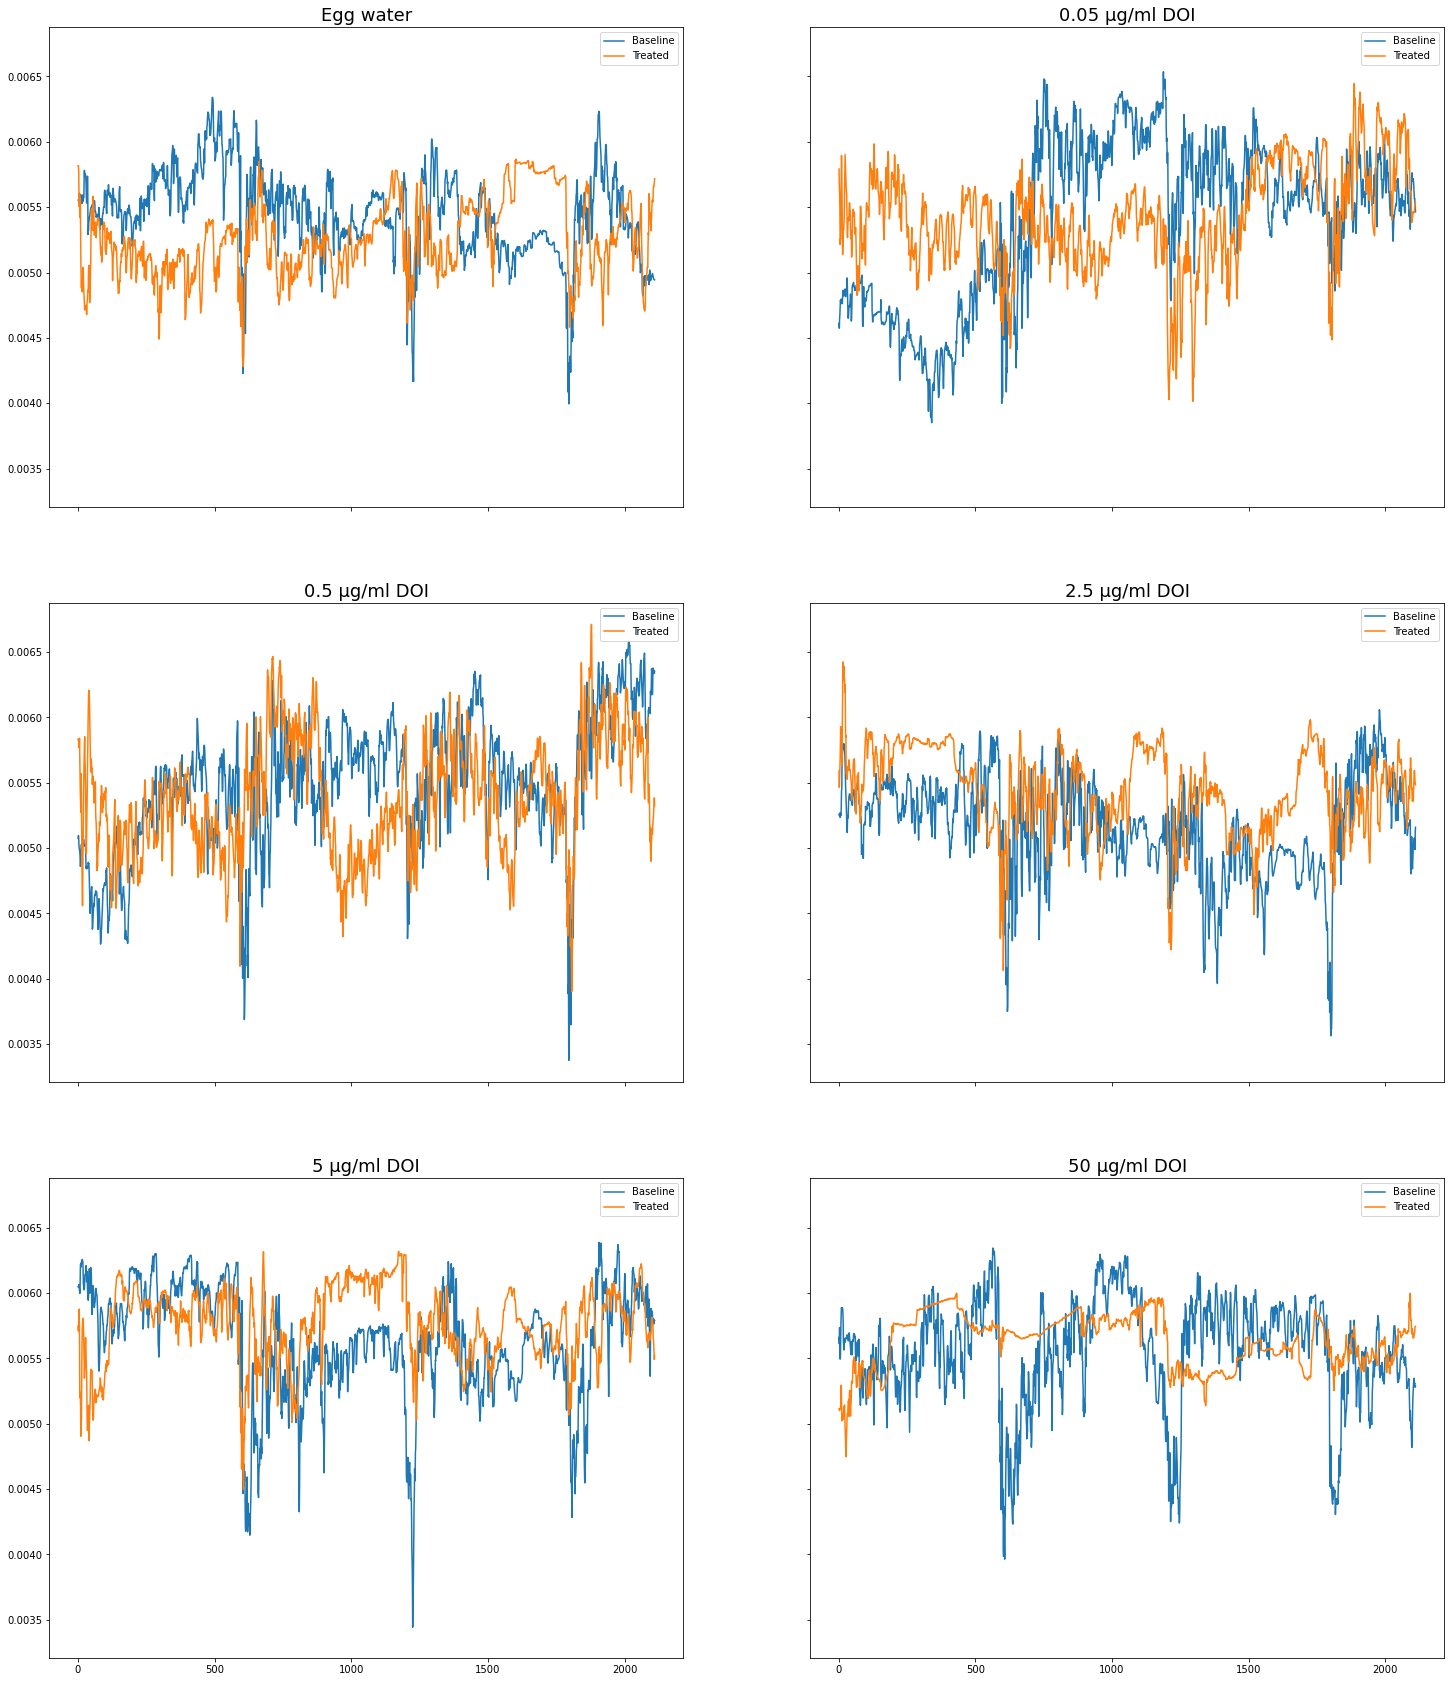

In [161]:
fig, axs = plt.subplots(3, 2, figsize=(25, 30), sharey=True, sharex=True)

axs[0, 0].plot(thigmo_dfs['baseline_dfs'][0].groupby(['binned_time']).mean()['average_dist_from_center'], label='Baseline')
axs[0, 0].plot(thigmo_dfs['drugtreated_dfs'][0].groupby(['binned_time']).mean()['average_dist_from_center'], label='Treated')
axs[0, 0].set_title('Egg water', fontsize=18)
axs[0, 0].legend()

axs[0, 1].plot(thigmo_dfs['baseline_dfs'][0.05].groupby(['binned_time']).mean()['average_dist_from_center'], label='Baseline')
axs[0, 1].plot(thigmo_dfs['drugtreated_dfs'][0.05].groupby(['binned_time']).mean()['average_dist_from_center'], label='Treated')
axs[0, 1].set_title('0.05 µg/ml DOI', fontsize=18)
axs[0, 1].legend()

axs[1, 0].plot(thigmo_dfs['baseline_dfs'][0.5].groupby(['binned_time']).mean()['average_dist_from_center'], label='Baseline')
axs[1, 0].plot(thigmo_dfs['drugtreated_dfs'][0.5].groupby(['binned_time']).mean()['average_dist_from_center'], label='Treated')
axs[1, 0].set_title('0.5 µg/ml DOI', fontsize=18)
axs[1, 0].legend()

axs[1, 1].plot(thigmo_dfs['baseline_dfs'][2.5].groupby(['binned_time']).mean()['average_dist_from_center'], label='Baseline')
axs[1, 1].plot(thigmo_dfs['drugtreated_dfs'][2.5].groupby(['binned_time']).mean()['average_dist_from_center'], label='Treated')
axs[1, 1].set_title('2.5 µg/ml DOI', fontsize=18)
axs[1, 1].legend()

axs[2, 0].plot(thigmo_dfs['baseline_dfs'][5].groupby(['binned_time']).mean()['average_dist_from_center'], label='Baseline')
axs[2, 0].plot(thigmo_dfs['drugtreated_dfs'][5].groupby(['binned_time']).mean()['average_dist_from_center'], label='Treated')
axs[2, 0].set_title('5 µg/ml DOI', fontsize=18)
axs[2, 0].legend()

axs[2, 1].plot(thigmo_dfs['baseline_dfs'][50].groupby(['binned_time']).mean()['average_dist_from_center'], label='Baseline')
axs[2, 1].plot(thigmo_dfs['drugtreated_dfs'][50].groupby(['binned_time']).mean()['average_dist_from_center'], label='Treated')
axs[2, 1].set_title('50 µg/ml DOI', fontsize=18)
axs[2, 1].legend()

plt.savefig(os.path.join(data_folder, f'distance_from_center_ed_binned{time_bin}s.pdf'))